In [1]:
# Importing pandas library
import pandas as pd

#importing pandas_profiling to help create a dataframe report on our dataset
import pandas_profiling


In [2]:
#Importing the King County data into pandas and running the head to get an over view of the dataset,
#followed by the .info to see the number of rows, number of null values and dtypes in the dataframe

df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# creating a profile report on the dataset with an HTML output
profile = df.profile_report(title='KC Housing Report')
profile.to_file(output_file="KCHousing.html")

In [5]:
#A quick check of the value counts to see if there are any major inconsistancies or null values

for col in df.columns:
    print("\n",df[col].value_counts().head(),"\n\n")


 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64 



 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64 



 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 



 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 



 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 



 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64 



 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64 



 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 



 0.0    19075
1.0      146
Name: waterfront, dtype: int64 



 0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64 



 3    14020
4     5677
5     1701
2 

In [6]:
#Retrieving the total sum of null values in each column

df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# EDA

## Initial cleaning

### Views

With our initial look at the data, we noticed that 89.9% of the properties listed had 0 views. It is highly unlikely that that 19422 properties have been sold without a single view. Therefore it is logical to assume that this column is unreliable and can therefore be removed.

In [7]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [8]:
df = df.drop('view', axis =1)

In [9]:
#a quick check to confirm that the column has successfully been removed from the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.3+ MB


In [10]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Waterfront

Based on our mapping of the properties, using geopandas, we noticed that there are clearly more than 146 properties that have a view of the waterfront let alone the ones that are on the waterfront. Furthermore, the 2376 missing will still not account for the actual number of properties with views of the waterfront. 

We therefore consider this column as unreliable and are therefore dropping it

In [11]:
# importing geopandas, descartes and matplotlib inorder to map out all the properties on a map of seattle

import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
#importing shapely inorder to incorporate the longitude and the latitude with geopandas

from shapely.geometry import Point, Polygon

In [13]:
#creating a shapley point based on a tuple of the long and lat
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:5]

In [14]:
# intiialising the coordinate reference system to allow geopandas to plot the long and lats of the different 
#properties

crs = {'init' : 'epsg:4326'}

In [15]:
#importing the shape file of the king county map

street_map = gpd.read_file('./tl_2017_53033_roads/tl_2017_53033_roads.shp')

In [16]:
# converting our dataframe into a geopandas dataframe

geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN          3  ...        1180            0.0   
1      7242     2.0         0.0          3  ...        2170          400.0   
2     10000     1.0         0.0          3  ...         770            0.0   
3      5000     1.0         0.0          5  ...        1050          910.0   
4      8080     1.0         0.0          3  ...        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0     1955           0.0    98178  47.5112 -122.257           1340   
1     1951        1991.0    98125  47.7210 -122.319           1690   
2     1933           NaN    98028  47.7379 -122.233           2720   
3     1965           0.0    98136  47.5208 -122.393           1360   
4     1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15                     geometry  
0        5650  POINT (-122.25700 47.51120)  
1        7639  POINT (-122.31900 47.72100)  
2        8062  POINT (-122.23300 47.73790)  
3        5000  POINT (-122.39300 47.52080)  
4        7503  POINT (-122.04500 47.61680)  

[5 rows x 21 columns]

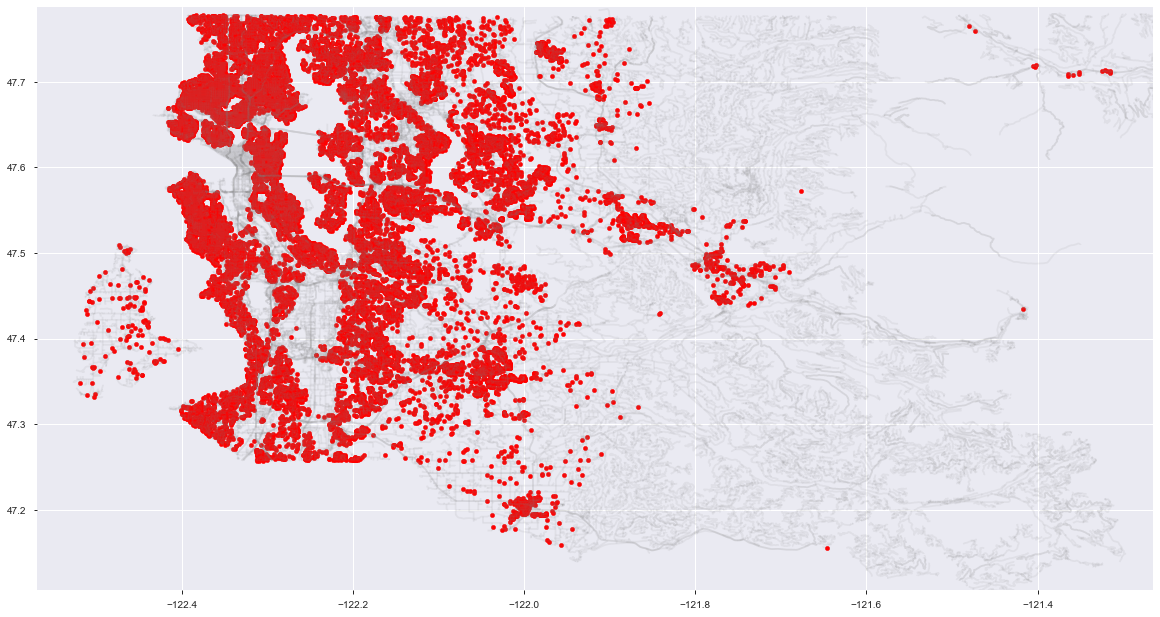

In [17]:
#maping the property listings on the king county map.
#we have limitid the map size as none of the properties hit the edges of the map
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
geo_df.plot(ax=ax, markersize = 20, color='red')
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('KC_properties.png')

In [18]:
df = df.drop(['waterfront'], axis = 1)

In [19]:
#a quick check to confirm that the column has successfully been removed from the dataframe. 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

## Year Renovated

During our analysis of the data we noticed that 17.8% of the year renovated data are null values. After furher investigation we found the majority of the properties, 78.8% have not been renovated. Therefore it is relatively safe to assume that these properties have also not been renovated. 

We have therefore replace the null values with the mode.

In [20]:
df['yr_renovated'].value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [21]:
#getting and replacing the null values with the mode.

renovated_mode = float(df.yr_renovated.mode())
df['yr_renovated'].fillna(renovated_mode, inplace =True)

In [22]:
#Checking to see if the null values in yr_renovated have been filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
geometry         21597 non-null geometry
dtypes: float64(6), geometry(1), int64(11), object(2)
memory usage: 3.3+ MB


## sqft_basement

A quick look at the df.info() shows that the sqft_basement is an object, after further investigation we noticed that the problem was 454 listing had a '?' as the value. In order to correct this we had to convert the column to a numeric column. 

In order to replace the the missing values we created a new column subtracting the the sqft_living from the sqft_above. We then created a boolean column to verify our calculations.

In [23]:
# Because sqft_basememnt is listed as an object, we need to analyze the data and see if there are any values 
# that are not ints or floats

#Clearly in this case there is a '?' as a value which is forcing the column to be an Object.

df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [24]:
#Converting to_numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')

In [25]:
#As we can see the '?' values have now become nulll values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
geometry         21597 non-null geometry
dtypes: float64(7), geometry(1), int64(11), object(1)
memory usage: 3.3+ MB


In [26]:
df['sqft_basement2'] = df['sqft_living'] - df['sqft_above']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21143 non-null float64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
geometry          21597 non-null geometry
sqft_basement2    21597 non-null int64
dtypes: float64(7), geometry(1), int64(12), object(1)


In [28]:
df.sqft_basement.value_counts().head()

0.0      12826
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

In [29]:
#Creating a boolean coolum to check if the values are eaqual.

df['basement_bool'] =  df['sqft_basement'].eq(df['sqft_basement2'])

In [30]:
df.head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   
11  9212900260   5/27/2014   468000.0         2       1.00         1160   
12   114101516   5/28/2014   310000.0         3       1.00         1430   
13  6054650070   10/7/2014   400000.0         3       1.75         1370   
14  1175000570   3/12/2015   530000.0         5       2.00         1810   
15  9297300055   1/24/2015   650000.0         4       3.00         2950   
16  1875500060   7/31/2014   395000.0         3       2.00         1890   
17  6865200140   5/29/2014   485000.0         4       1.00         1600   
18    16000397   12/5/2014   189000.0         2       1.00         1200   
19  7983200060   4/24/2015   230000.0         3       1.00         1250   

    sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  zipcode  \
0       5650     1.0          3      7  ...      1955           0.0    98178   
1       7242     2.0          3      7  ...      1951        1991.0    98125   
2      10000     1.0          3      6  ...      1933           0.0    98028   
3       5000     1.0          5      7  ...      1965           0.0    98136   
4       8080     1.0          3      8  ...      1987           0.0    98074   
5     101930     1.0          3     11  ...      2001           0.0    98053   
6       6819     2.0          3      7  ...      1995           0.0    98003   
7       9711     1.0          3      7  ...      1963           0.0    98198   
8       7470     1.0          3      7  ...      1960           0.0    98146   
9       6560     2.0          3      7  ...      2003           0.0    98038   
10      9796     1.0          3      8  ...      1965           0.0    98007   
11      6000     1.0          4      7  ...      1942           0.0    98115   
12     19901     1.5          4      7  ...      1927           0.0    98028   
13      9680     1.0          4      7  ...      1977           0.0    98074   
14      4850     1.5          3      7  ...      1900           0.0    98107   
15      5000     2.0          3      9  ...      1979           0.0    98126   
16     14040     2.0          3      7  ...      1994           0.0    98019   
17      4300     1.5          4      7  ...      1916           0.0    98103   
18      9850     1.0          4      7  ...      1921           0.0    98002   
19      9774     1.0          4      7  ...      1969           0.0    98003   

        lat     long  sqft_living15  sqft_lot15                     geometry  \
0   47.5112 -122.257           1340        5650  POINT (-122.25700 47.51120)   
1   47.7210 -122.319           1690        7639  POINT (-122.31900 47.72100)   
2   47.7379 -122.233           2720        8062  POINT (-122.23300 47.73790)   
3   47.5208 -122.393           1360        5000  POINT (-122.39300 47.52080)   
4   47.6168 -122.045           1800        7503  POINT (-122.04500 47.61680)   
5   47.6561 -122.005           4760      101930  POINT (-122.00500 47.65610)   
6   47.3097 -122.327           2238        6819  POINT (-122.32700 47.30970)   
7   47.4095 -122.315           1650        9711  POINT (-122.31500 47.40950)   
8   47.5123 -122.337           1780

In [31]:
#checking the number of false values
false_basement = df[df['basement_bool']==False]

In [32]:
#As we can through the boolean column we have correctly identified and corrected the mistakes in the sqft_basement. 
#As we now have the correct data in sqft_basement2 we can drop sqft_basement 
false_basement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 6 to 21581
Data columns (total 22 columns):
id                454 non-null int64
date              454 non-null object
price             454 non-null float64
bedrooms          454 non-null int64
bathrooms         454 non-null float64
sqft_living       454 non-null int64
sqft_lot          454 non-null int64
floors            454 non-null float64
condition         454 non-null int64
grade             454 non-null int64
sqft_above        454 non-null int64
sqft_basement     0 non-null float64
yr_built          454 non-null int64
yr_renovated      454 non-null float64
zipcode           454 non-null int64
lat               454 non-null float64
long              454 non-null float64
sqft_living15     454 non-null int64
sqft_lot15        454 non-null int64
geometry          454 non-null geometry
sqft_basement2    454 non-null int64
basement_bool     454 non-null bool
dtypes: bool(1), float64(7), geometry(1), int64(12), object(1)
m

In [33]:
df = df.drop('sqft_basement', axis =1)

In [34]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
condition         0
grade             0
sqft_above        0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
geometry          0
sqft_basement2    0
basement_bool     0
dtype: int64

## Finding Duplicate 'id's

Checking to see if there are any duplicates that have significant value. if they dont have any significant value then we can remove them. 

After analysing the data for duplicates,we initially found found 177 duplicates of those we decide to remove 3 properties as they were bought and sold for the same price thus having no significant impact on our overall data.

In [58]:
# Checking for duplicates in the id column
dups = df[df.duplicated(subset=['id','price'], keep = 'last')]

In [59]:
dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3946 to 20037
Data columns (total 21 columns):
id                3 non-null int64
date              3 non-null object
price             3 non-null float64
bedrooms          3 non-null int64
bathrooms         3 non-null float64
sqft_living       3 non-null int64
sqft_lot          3 non-null int64
floors            3 non-null float64
condition         3 non-null int64
grade             3 non-null int64
sqft_above        3 non-null int64
yr_built          3 non-null int64
yr_renovated      3 non-null float64
zipcode           3 non-null int64
lat               3 non-null float64
long              3 non-null float64
sqft_living15     3 non-null int64
sqft_lot15        3 non-null int64
geometry          3 non-null geometry
sqft_basement2    3 non-null int64
basement_bool     3 non-null bool
dtypes: bool(1), float64(6), geometry(1), int64(12), object(1)
memory usage: 507.0+ bytes


In [60]:
dups

id       date     price  bedrooms  bathrooms  sqft_living  \
3946   1825069031  8/14/2014  550000.0         4       1.75         2410   
14968  6308000010  12/8/2014  585000.0         3       2.50         2290   
20037  8648900110   5/5/2014  555000.0         3       2.50         1940   

       sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  \
3946       8447     2.0          4      8  ...      1936        1980.0   
14968      5089     2.0          3      9  ...      2001           0.0   
20037      3211     2.0          3      8  ...      2009           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  \
3946     98074  47.6499 -122.088           2520       14789   
14968    98006  47.5443 -122.172           2290        7984   
20037    98027  47.5644 -122.093           1880        3078   

                          geometry sqft_basement2  basement_bool  
3946   POINT (-122.08800 47.64990)            350           True  
14968  POINT (-122.17200 47.54430)              0           True  
20037  POINT (-122.09300 47.56440)              0           True  

[3 rows x 21 columns]

In [61]:
id_list = list(dups.id.values)

In [64]:
df= df.drop_duplicates(subset = ['id', 'price'], keep = 'first')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21594 entries, 0 to 21596
Data columns (total 21 columns):
id                21594 non-null int64
date              21594 non-null object
price             21594 non-null float64
bedrooms          21594 non-null int64
bathrooms         21594 non-null float64
sqft_living       21594 non-null int64
sqft_lot          21594 non-null int64
floors            21594 non-null float64
condition         21594 non-null int64
grade             21594 non-null int64
sqft_above        21594 non-null int64
yr_built          21594 non-null int64
yr_renovated      21594 non-null float64
zipcode           21594 non-null int64
lat               21594 non-null float64
long              21594 non-null float64
sqft_living15     21594 non-null int64
sqft_lot15        21594 non-null int64
geometry          21594 non-null geometry
sqft_basement2    21594 non-null int64
basement_bool     21594 non-null bool
dtypes: bool(1), float64(6), geometry(1), int64(12), obje

# Questions

Looking at the top 2000 high end properties and comparing them to a random sample set of similar size, we wanted to understand:

<ol>
    <li>What makes a property high end?</li>
    <ol>
        <li>Living size</li>
        <li>Lot size</li>
        <li>Location</li>
        <li>Sqft_linving15</li>
        <li>sqft_lot15</li>
        <li>Zipcode</li></ol>

   <li>Does the number of bedrooms affect the overall price?</li>
   <li>Does the year built affect the overall price?</li>
   </ol>


## Method
Our initial approach to the questions begins with understanding the data as a whole. Once we have ploted and understood the data we created two subsets: the first being top 2000 most expensive properties, the second a random sample made up of 2000 properties not including the most expensive.

Through this we were able to compare the differences of the two subsests and find what defines the high end properties.

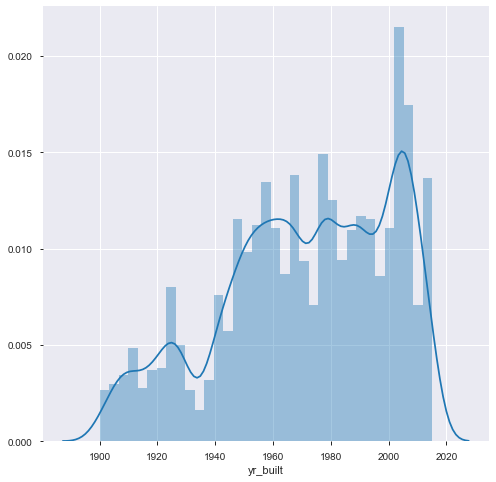

In [71]:
#looking at the distribubtion of properties base on year built

plt.figure(figsize = (8,8))
ax = sns.distplot(df['yr_built'])


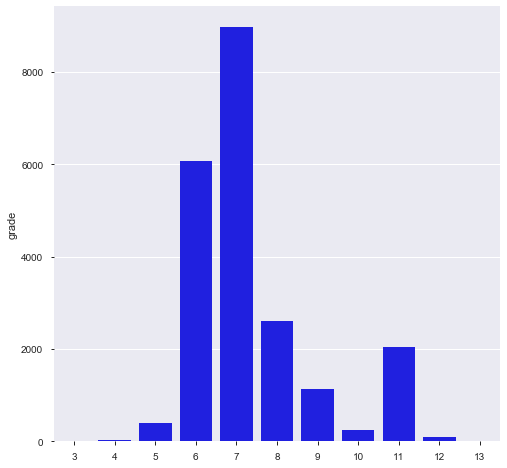

In [72]:
#checking the number of properties based on grade
plt.figure(figsize = (8,8))
ax2= sns.barplot(df['grade'].unique(), df['grade'].value_counts(), color='blue')

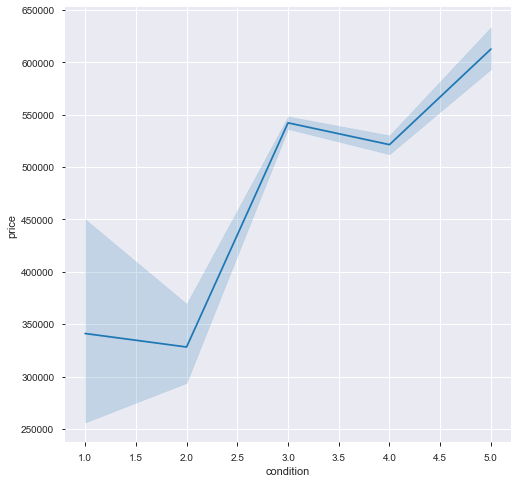

In [73]:
#comparing whether the price increases with condition
plt.figure(figsize = (8,8))
ax= sns.lineplot(df['condition'], df['price'])

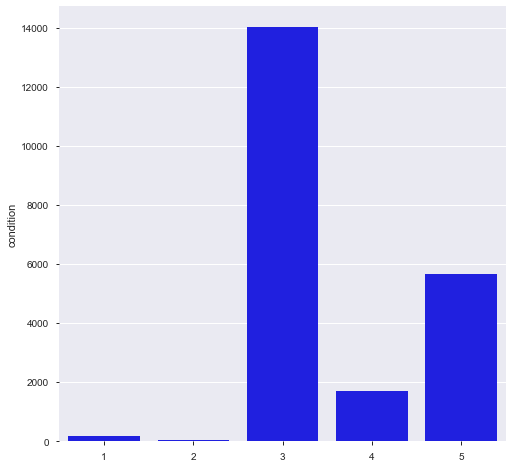

In [96]:
plt.figure(figsize = (8,8))
ax= sns.barplot(df.condition.unique(), df.condition.value_counts(), color = 'blue')

In [97]:
#due to an error in the above plot we have decide to create a pandas series based on the unique values of 
#Condition in order to plot it out correctly.
con=df['condition'].value_counts()
con

3    14018
4     5676
5     1701
2      170
1       29
Name: condition, dtype: int64

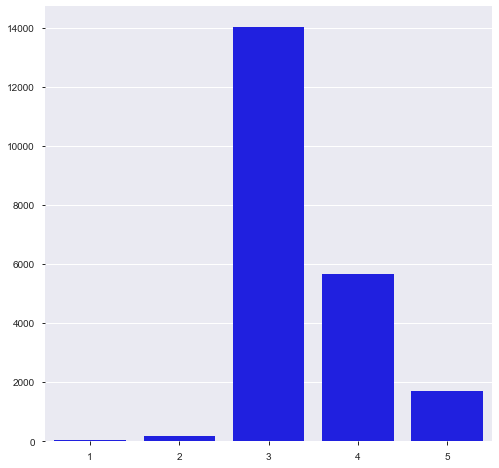

In [99]:
# here we have a correct plot based on the pandas series.

plt.figure(figsize = (8,8))
ax= sns.barplot(con.index, con.values, color = 'blue')

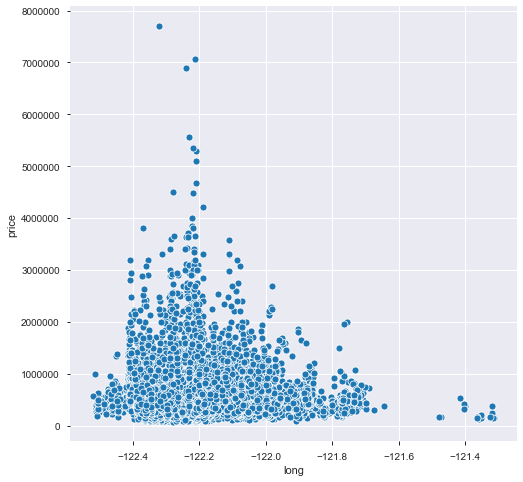

In [100]:
#Comparing price based on longitudinal location
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['long'], df['price'])

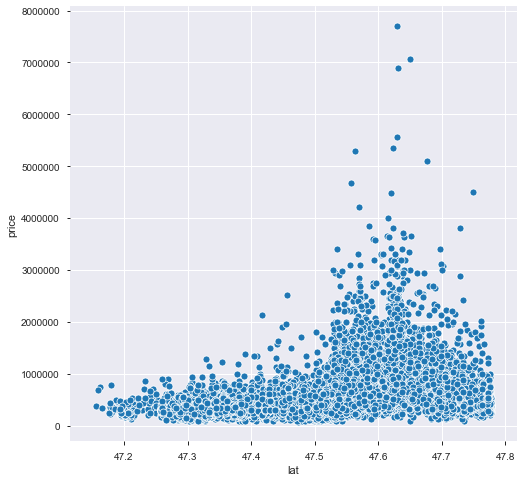

In [101]:
#comparing price based on latitudinal location

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['lat'], df['price'])

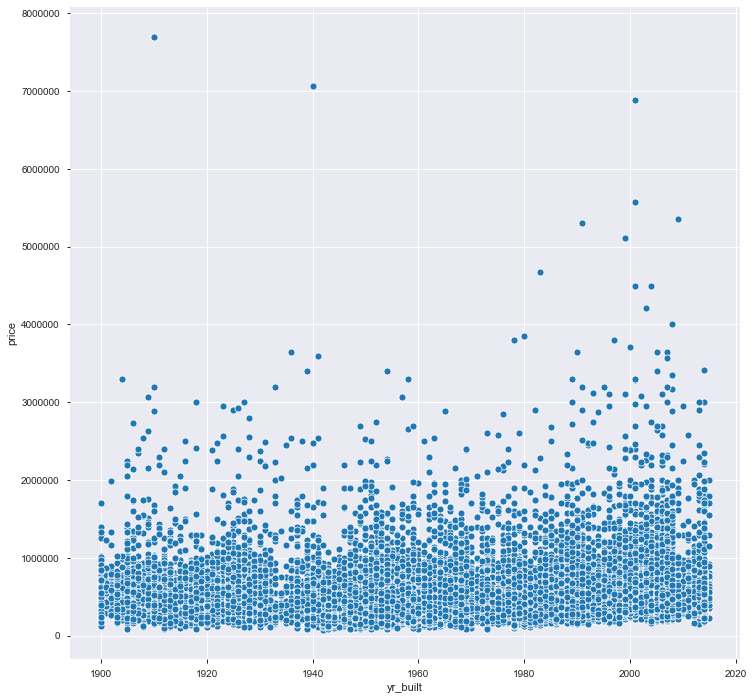

In [102]:
#checking if year built has any effect on price. 
#based on the plot below, there is no correlation.

plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['yr_built'], df['price'])

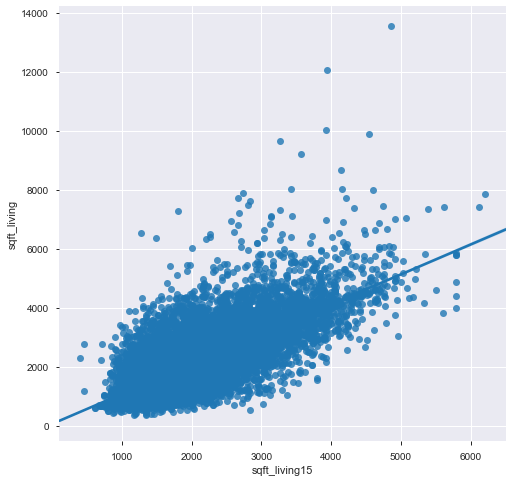

In [103]:
#when comparing the sqft_living with sqft_living15 we can see a slight correlation 

plt.figure(figsize = (8,8))
ax= sns.regplot(df['sqft_living15'], df['sqft_living'])

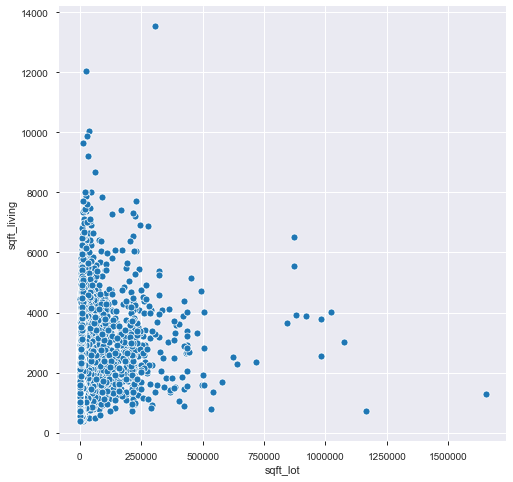

In [84]:
# plotting sqft_lot to sqft_living, however this does give an accurate indication of the size of the 
# properties as houses can be built up on several floors

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot'], df['sqft_living'])

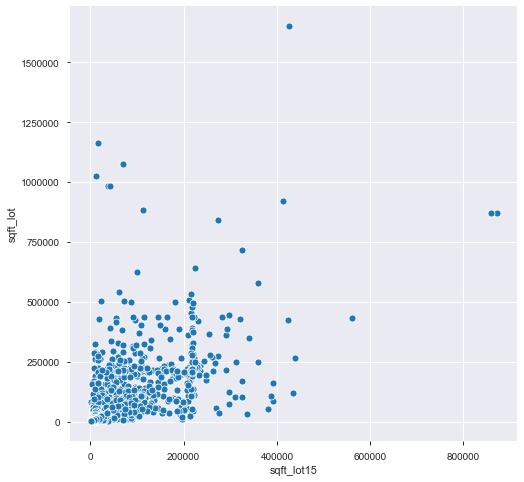

In [85]:
#checking to see if the is a direct correlation size of the lot and the neighboring property lots

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot15'], df['sqft_lot'])

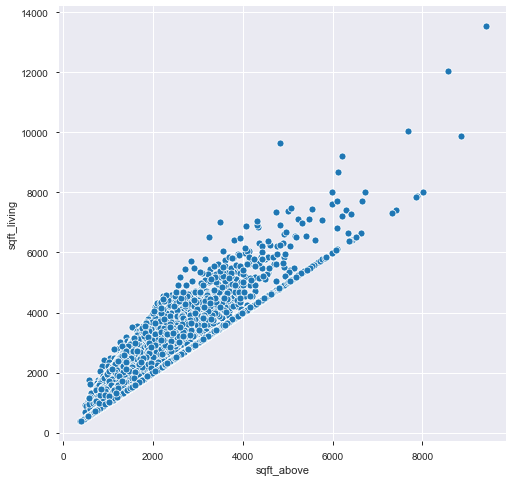

In [86]:
# There is however a stong correlation between linving space and sqft above the basement.
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_above'], df['sqft_living'])

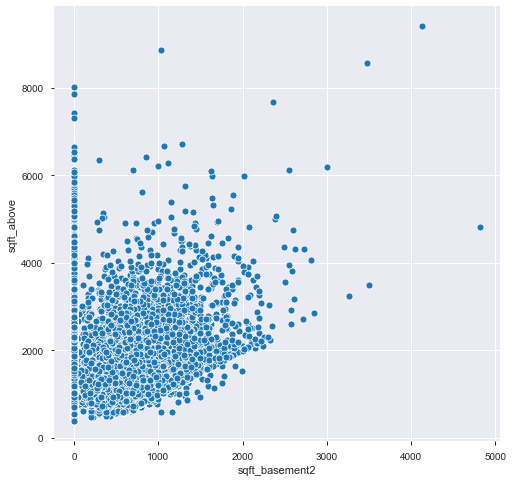

In [88]:
#there is no real correlation between the basement size and the sqft above. There fore it would dificult to 
# predict the size of the living area above the basement.

plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_basement2'], df['sqft_above'])

## Creating our subsets 

We initially sorted our dataframe in descending order of price, afterwhich we created a subset of the 2000 most expensive properties.

In [104]:
most_expensive_df = df.sort_values('price', ascending = False)

In [105]:
most_expensive_2000 = most_expensive_df.iloc[0:2000]

In [106]:
most_expensive_2000.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910  9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245  9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407  2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446  8907500070   4/13/2015  5350000.0         5       5.00         8000   

      sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  \
7245     27600     2.5          4     13  ...      1910        1987.0   
3910     37325     2.0          3     11  ...      1940        2001.0   
9245     31374     2.0          3     13  ...      2001           0.0   
4407     35069     2.0          3     13  ...      2001           0.0   
1446     23985     2.0          3     12  ...      2009           0.0   

      zipcode      lat     long  sqft_living15  sqft_lot15  \
7245    98102  47.6298 -122.323           3940        8800   
3910    98004  47.6500 -122.214           3930       25449   
9245    98039  47.6305 -122.240           4540       42730   
4407    98039  47.6289 -122.233           3560       24345   
1446    98004  47.6232 -122.220           4600       21750   

                         geometry sqft_basement2  basement_bool  
7245  POINT (-122.32300 47.62980)           3480           True  
3910  POINT (-122.21400 47.65000)           2360           True  
9245  POINT (-122.24000 47.63050)           1030           True  
4407  POINT (-122.23300 47.62890)           3000           True  
1446  POINT (-122.22000 47.62320)           1280           True  

[5 rows x 21 columns]

In [107]:
most_expensive_2000.tail()

id       date     price  bedrooms  bathrooms  sqft_living  \
545    2944000240  4/22/2015  910000.0         4       2.50         3350   
8371   2426059097   3/5/2015  910000.0         4       2.50         3530   
14862  1125059071  5/22/2014  910000.0         4       3.25         3340   
20665  1233100710  4/16/2015  909950.0         5       3.75         3050   
19863  8562710640  2/11/2015  909500.0         4       4.00         4420   

       sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  \
545       29242     2.0          3     11  ...      1988           0.0   
8371      49222     2.0          4      9  ...      1986           0.0   
14862     10890     1.5          3      9  ...      1963        2000.0   
20665      8972     2.0          3      9  ...      2014           0.0   
19863      5940     2.0          3     10  ...      2006           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  \
545      98052  47.7197 -122.131           3920       24728   
8371     98072  47.7285 -122.112           3750       49222   
14862    98052  47.6677 -122.136           2880        9794   
20665    98033  47.6819 -122.172           2750        8979   
19863    98027  47.5397 -122.072           4510        5797   

                          geometry sqft_basement2  basement_bool  
545    POINT (-122.13100 47.71970)              0           True  
8371   POINT (-122.11200 47.72850)              0           True  
14862  POINT (-122.13600 47.66770)           1100           True  
20665  POINT (-122.17200 47.68190)              0           True  
19863  POINT (-122.07200 47.53970)           1010           True  

[5 rows x 21 columns]

In [108]:
print("Of the 2,000 most expensive properties:")
print("The most expensive property value is:" , most_expensive_2000.price.max())
print("The least expensive property value is:" , most_expensive_2000.price.min())

Of the 2,000 most expensive properties:
The most expensive property value is: 7700000.0
The least expensive property value is: 909500.0


In [109]:
#Creating the geopandas dataframe inorder to map out our most expensive properties on a map

index_list=list(most_expensive_2000.index.values)

In [110]:
len(index_list)

2000

In [111]:
me2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list)]

In [112]:
me2000_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2000 entries, 5 to 21590
Data columns (total 21 columns):
id               2000 non-null int64
date             2000 non-null object
price            2000 non-null float64
bedrooms         2000 non-null int64
bathrooms        2000 non-null float64
sqft_living      2000 non-null int64
sqft_lot         2000 non-null int64
floors           2000 non-null float64
waterfront       1795 non-null float64
condition        2000 non-null int64
grade            2000 non-null int64
sqft_above       2000 non-null int64
sqft_basement    2000 non-null object
yr_built         2000 non-null int64
yr_renovated     1646 non-null float64
zipcode          2000 non-null int64
lat              2000 non-null float64
long             2000 non-null float64
sqft_living15    2000 non-null int64
sqft_lot15       2000 non-null int64
geometry         2000 non-null geometry
dtypes: float64(7), geometry(1), int64(11), object(2)
memory usage: 343.8+ KB


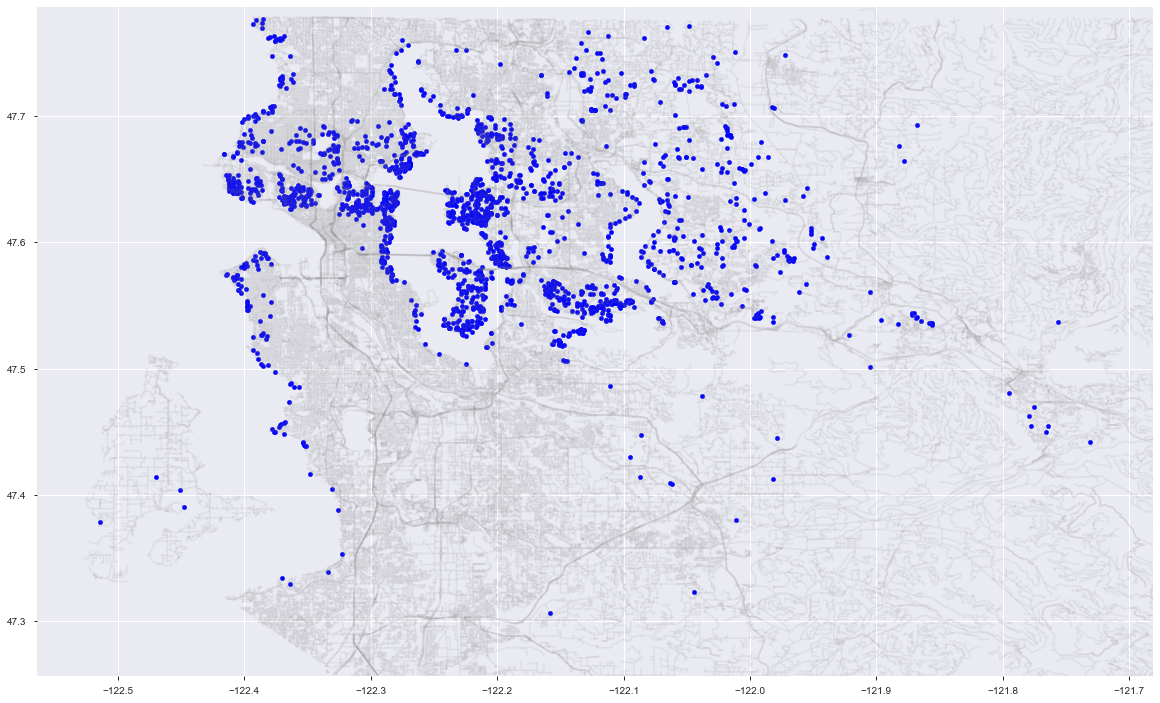

In [114]:
# by mapping the location of our most expensive properties we can see that there are a few clusters, also the 
# vast majority are along or near the waterfront.

fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='blue')
minx, miny, maxx, maxy = me2000_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('most_expensive_2000.png')

In [121]:
#checking to see if the are popular zipcodes among the 2000 most expensive properties. zipcode 98004 has roughly 10% 
# of the most expensive properties in it.

most_expensive_2000['zipcode'].value_counts().head(10)

98004    216
98040    173
98006    161
98112    136
98033    106
98199     84
98105     71
98075     66
98115     56
98053     52
Name: zipcode, dtype: int64

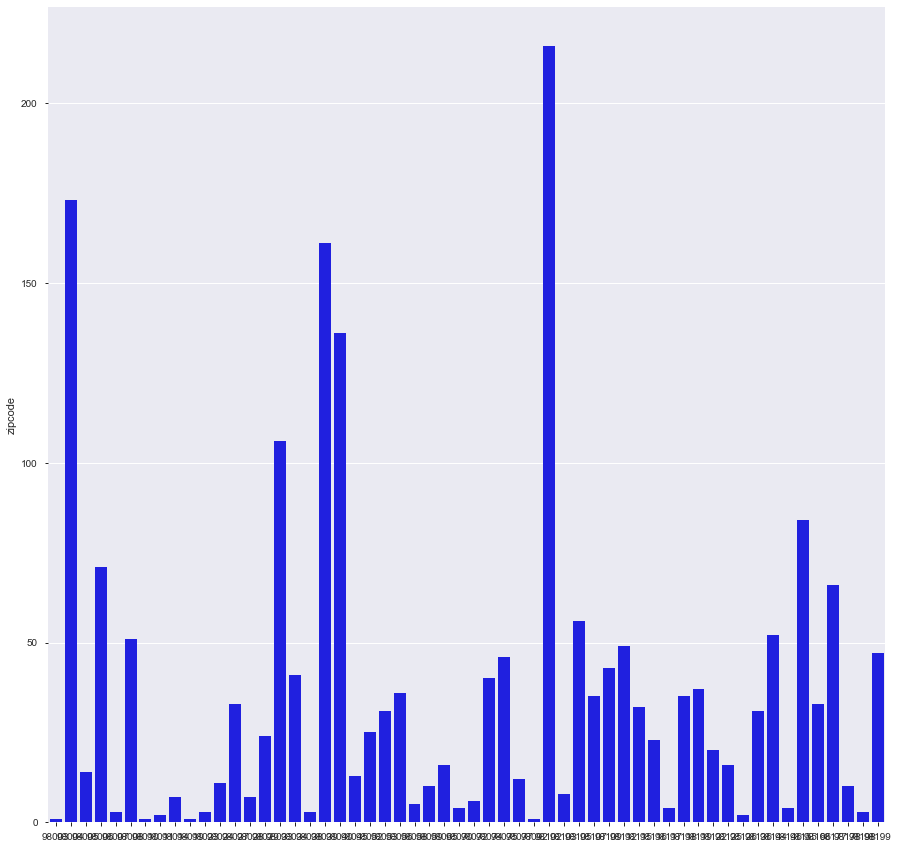

In [120]:
plt.figure(figsize = (15,15))
ax = sns.barplot(most_expensive_2000['zipcode'].unique(), most_expensive_2000['zipcode'].value_counts(), color = 'blue')

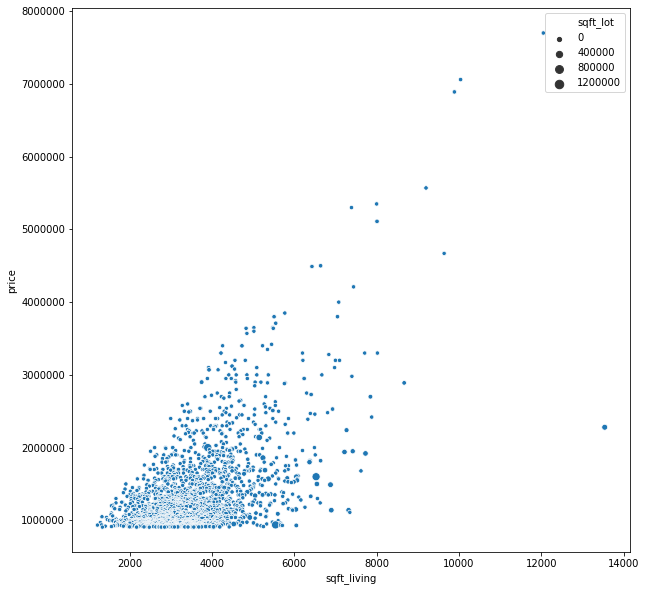

In [74]:

plt.figure(figsize = (10,10))
ax= sns.scatterplot(most_expensive_2000['sqft_living'], most_expensive_2000['price'], size = most_expensive_2000['sqft_lot'])

In [122]:
#We are subtracting the 2000 most expensive properties from the main dataframe in order to create a sample set
df_minus2000 = df.drop(most_expensive_2000.index, axis=0)
df_minus2000.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  condition  grade  ...  yr_built  yr_renovated  zipcode  \
0      5650     1.0          3      7  ...      1955           0.0    98178   
1      7242     2.0          3      7  ...      1951        1991.0    98125   
2     10000     1.0          3      6  ...      1933           0.0    98028   
3      5000     1.0          5      7  ...      1965           0.0    98136   
4      8080     1.0          3      8  ...      1987           0.0    98074   

       lat     long  sqft_living15  sqft_lot15                     geometry  \
0  47.5112 -122.257           1340        5650  POINT (-122.25700 47.51120)   
1  47.7210 -122.319           1690        7639  POINT (-122.31900 47.72100)   
2  47.7379 -122.233           2720        8062  POINT (-122.23300 47.73790)   
3  47.5208 -122.393           1360        5000  POINT (-122.39300 47.52080)   
4  47.6168 -122.045           1800        7503  POINT (-122.04500 47.61680)   

  sqft_basement2  basement_bool  
0              0           True  
1            400           True  
2              0           True  
3            910           True  
4              0           True  

[5 rows x 21 columns]

In [123]:
df_sample2000 = df_minus2000.sample(n=2000, random_state = 6)
df_sample2000

id        date     price  bedrooms  bathrooms  sqft_living  \
16742  2770601763   3/23/2015  450000.0         3       3.50         1790   
3233   7660600131  10/20/2014  374950.0         2       2.25         1240   
3896   6821102352   10/8/2014  330000.0         2       1.00          880   
10080  4319200060    7/9/2014  840000.0         3       2.00         2783   
7803   1529300115    6/2/2014  455000.0         2       1.00         1170   
8827   6384500035    7/1/2014  370000.0         2       1.00          860   
1184   1023059324   6/23/2014  235000.0         3       1.00         1170   
20723  9122001230   12/5/2014  590000.0         3       3.50         1970   
15327  5700000275   5/28/2014  635000.0         3       2.50         2300   
10733  6450302545    5/8/2015  443000.0         3       1.00         1280   
6569   4318200440   5/22/2014  432000.0         3       2.25         1470   
20297  3395070440    2/9/2015  305000.0         3       2.50         1320   
7040   1545805980  11/10/2014  390000.0         3       2.50         2770   
7635   2987400025   10/9/2014  253000.0         3       1.00         1030   
18843  2011400782    8/4/2014  229500.0         1       1.00         1180   
7768   1150000740   10/3/2014  639000.0         4       2.50         1990   
11440  1737320060   6/10/2014  366000.0         3       1.75         1520   
6364   5253300387   1/28/2015  215000.0         3       1.00          860   
2410     11520640    8/1/2014  810000.0         4       2.75         3010   
4581    339600090   9/25/2014  369950.0         3       2.50         1360   
1895   6381500505    4/2/2015  400000.0         3       1.00         1250   
18991  1205000215   4/29/2015  455000.0         2       1.50         1090   
5336   6632900574   2/25/2015  595000.0         5       3.00         2980   
7356    739800250   2/22/2015  269000.0         3       2.25         1420   
19756  9272201318   4/14/2015  540000.0         3       2.00         1580   
6090   4136930190  10/28/2014  427500.0         4       2.50         3160   
12395  9206950200   3/10/2015  352000.0         2       2.50         1320   
1229    613400030  10/24/2014  360000.0         3       2.75         2030   
18138  7574910450    2/3/2015  845000.0         4       2.50         3360   
19686   255370570  11/20/2014  359950.0         4       3.50         2690   
...           ...         ...       ...       ...        ...          ...   
5151   3904910050  10/23/2014  515000.0         3       2.50         1440   
11511  1523069128   3/31/2015  625000.0         5       2.75         2910   
6444   3904901330   8/20/2014  449950.0         3       2.25         1610   
162    7215720160    3/4/2015  900000.0         3       2.50         3400   
20155  8562901100  12/30/2014  550000.0         3       2.50         2430   
10641  9320700400  10/31/2014  285000.0         3       1.75         1560   
6042   3825310130   6/24/2014  751000.0         4       3.25         3090   
6128    255550190   7/22/2014  350000.0         3       2.50         2100   
7194   6868200029   9/29/2014  467500.0         3       1.75         2260   
21200  5100403818   2/20/2015  369500.0         3       2.00         1108   
13538  7202330610   7/21/2014  528000.0         3       2.50         2020   
13637  7131300063   4/29/2015  350000.0         4       1.75         2140   
18738  3876313120    5/1/2015  505000.0         3       1.75         1800   
17643  3222049151  10/30/2014  820000.0         3       2.50         2990   
7810   1311400120    8/1/2014  160000.0         3       1.75         1610   
9708    312000295   1/22/2015  400000.0         2       1.00          920   
7258    123039642    5/1/2015  540000.0         3       2.50         1970   
14153  2722059010   6/18/2014  568450.0         5       3.50         3260   
18311  1796370590    3/5/2015  255000.0         3       2.00         1490   
17948  2824069373   5/15/2014  765000.0         5       3.75         3580   
16002  7784

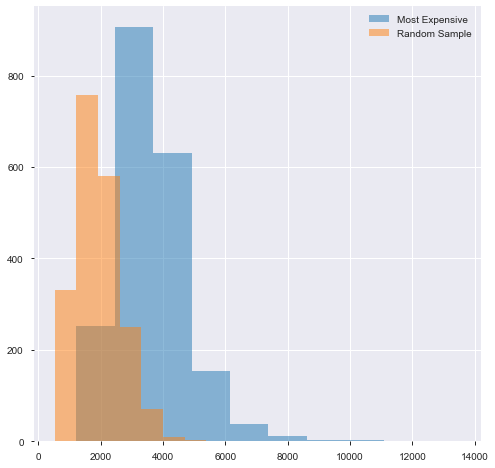

In [124]:
#comparing sqft_living of the most expensive properties and the random sample. Clearly the most expensive properties 
# a larger living areas even though there is a slight overlap.

plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_2000['sqft_living'], alpha = 0.5, label = 'Most Expensive')
ax2 = plt.hist(df_sample2000['sqft_living'], alpha = 0.5, label = 'Random Sample')
plt.legend()

In [125]:


list_beds1=list(most_expensive_2000.bedrooms.value_counts())
list_beds2=list(df_sample2000.bedrooms.value_counts())

In [126]:
# comparing the two data sets based on the number of bedrooms

# The mode number of bedroom of the most expensive properties is 4 

me_beds = most_expensive_2000.bedrooms.value_counts()
me_beds

4     1013
3      451
5      405
6       64
2       47
7       11
8        4
9        3
10       1
1        1
Name: bedrooms, dtype: int64

In [127]:
# The mode number of bedroom of the most expensive properties is 3

sample_beds = df_sample2000.bedrooms.value_counts()
sample_beds

3    977
4    590
2    283
5    112
1     19
6     15
7      4
Name: bedrooms, dtype: int64

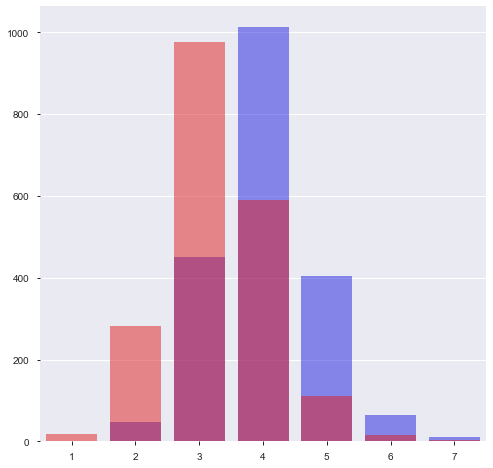

In [129]:
#There are actually more 3 bedrooms in our sample set then there are in our most expensive properties 

plt.figure(figsize = (8,8))
ax= sns.barplot(me_beds.index.values, me_beds.values, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(sample_beds.index.values, sample_beds.values, color = 'red', alpha = 0.5)

In [130]:
print("The mean number of bedroom in the most expensive properties is:", most_expensive_2000.bedrooms.mean())
print("The mean number of bedrooms in the sample is: ", df_sample2000.bedrooms.mean())

The mean number of bedroom in the most expensive properties is: 4.0275
The mean number of bedrooms in the sample is:  3.277


In [131]:
most_expensive_2000.bedrooms.unique()

array([ 6,  5,  4,  3,  8,  2,  7,  9,  1, 10])

In [135]:
#grouping the sample sets by number rooms in order to get the mean values for comparitive reasons
me_bed_mean = most_expensive_2000.groupby('bedrooms').mean()

In [136]:
me_bed_mean

id         price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                     
1         7.240690e+08  1.250000e+06   1.250000  1810.000000   5070.000000   
2         4.799409e+09  1.245184e+06   2.250000  2549.148936  35501.382979   
3         4.159571e+09  1.285904e+06   2.578714  2992.394678  18063.447894   
4         4.202839e+09  1.343951e+06   3.074778  3646.013820  26864.127345   
5         4.336820e+09  1.522837e+06   3.465432  4111.355556  19083.222222   
6         4.119156e+09  1.712451e+06   3.824219  4663.359375  26076.765625   
7         3.596196e+09  1.853182e+06   4.386364  5632.727273  43017.636364   
8         1.255600e+09  2.267500e+06   4.062500  5132.500000  12077.750000   
9         9.156834e+09  1.204667e+06   3.833333  3696.666667   4996.000000   
10        6.273001e+08  1.150000e+06   5.250000  4590.000000  10920.000000   

            floors  condition      grade   sqft_above     yr_built  \
bedrooms                                                             
1         1.500000   4.000000   8.000000  1230.000000  1967.000000   
2         1.765957   3.531915   9.000000  2094.255319  1970.787234   
3         1.684035   3.490022   9.126386  2442.949002  1966.858093   
4         1.815400   3.468904   9.688055  3086.842053  1976.626851   
5         1.834568   3.419753   9.770370  3350.960494  1979.318519   
6         1.968750   3.531250   9.796875  3549.140625  1965.718750   
7         2.090909   3.363636  10.181818  4400.000000  1972.636364   
8         2.125000   4.250000   9.750000  3897.500000  1948.000000   
9         2.166667   3.000000   8.666667  2760.000000  1916.000000   
10        1.000000   3.000000   9.000000  2500.000000  2008.000000   

          yr_renovated       zipcode        lat        long  sqft_living15  \
bedrooms                                                                     
1             0.000000  98075.000000  47.581400 -122.081000    2280.000000   
2           211.659574  98088.808511  47.613419 -122.241000    2525.297872   
3           212.778271  98083.922395  47.621609 -122.258847    2731.148559   
4           161.853899  98066.036525  47.616766 -122.205117    3034.893386   
5           163.088889  98060.288889  47.616516 -122.203099    3114.444444   
6           249.296875  98078.406250  47.618241 -122.240625    3117.890625   
7           364.363636  98051.727273  47.617627 -122.194273    3304.545455   
8             0.000000  98058.000000  47.630725 -122.260000    3592.500000   
9           670.000000  98105.000000  47.664733 -122.301667    2560.000000   
10            0.000000  98004.000000  47.586100 -122.113000    2730.000000   

            sqft_lot15  sqft_basement2  basement_bool  
bedrooms                                               
1          5070.000000      580.000000       1.000000  
2         22248.893617      454.893617       0.957447  
3         13842.017738      549.445676       0.984479  
4         19919.999013      559.171767       0.979269  
5         15476.743210      760.395062       0.980247  
6         20157.000000     1114.218750       1.000000  
7         29857.090909     1232.727273       1.000000  
8         11641.250000     1235.000000       1.000000  
9          4573.333333      936.666667       1.000000  
10        10400.000000     2090.000000       1.000000

In [137]:
df_sample_bed_mean = df_sample2000.groupby('bedrooms').mean()

In [138]:
df_sample_bed_mean

id          price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                      
1         3.759563e+09  357965.789474   1.263158  1071.052632  10471.526316   
2         4.611749e+09  382541.763251   1.390459  1225.388693   8382.925795   
3         4.595817e+09  427818.469806   1.931679  1763.151484  13938.166837   
4         4.635289e+09  523278.437288   2.339831  2374.323729  15289.900000   
5         4.091403e+09  511934.392857   2.502232  2603.821429  13514.910714   
6         4.603790e+09  560886.666667   2.666667  2710.000000   8381.333333   
7         5.302676e+09  699975.000000   4.187500  4717.500000  16275.000000   

            floors  condition     grade   sqft_above     yr_built  \
bedrooms                                                            
1         1.342105   3.315789  6.578947   954.210526  1942.894737   
2         1.303887   3.431095  6.812721  1105.671378  1954.166078   
3         1.448311   3.427840  7.419652  1558.383828  1971.676561   
4         1.598305   3.366102  7.884746  2071.069492  1977.383051   
5         1.401786   3.446429  7.660714  1987.214286  1971.696429   
6         1.466667   3.466667  7.466667  2031.333333  1957.333333   
7         1.625000   3.000000  8.500000  3700.000000  1961.500000   

          yr_renovated       zipcode        lat        long  sqft_living15  \
bedrooms                                                                     
1           312.368421  98099.263158  47.556453 -122.219789    1497.368421   
2            63.296820  98107.003534  47.590833 -122.278032    1489.473498   
3            69.498465  98076.000000  47.547429 -122.212832    1784.330604   
4            60.823729  98070.967797  47.551466 -122.182463    2181.383051   
5            35.562500  98073.633929  47.561235 -122.216670    2123.607143   
6           263.933333  98078.266667  47.549440 -122.253600    1930.666667   
7             0.000000  98130.750000  47.545750 -122.314000    2157.500000   

            sqft_lot15  sqft_basement2  basement_bool  
bedrooms                                               
1         11754.894737      116.842105       0.947368  
2          7132.932862      119.717314       0.978799  
3         12954.797339      204.767656       0.983623  
4         13637.374576      303.254237       0.984746  
5         11064.035714      616.607143       0.955357  
6          7296.733333      678.666667       1.000000  
7         13866.500000     1017.500000       1.000000

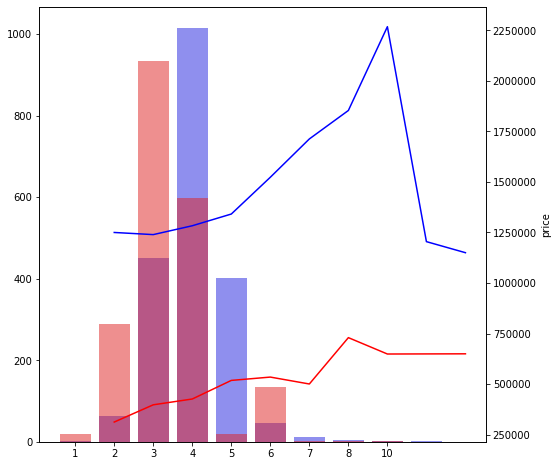

In [130]:
# comparing the number of bedrooms and price. we can see a clear difference in starting prices for 2 bedroom properties
# how ever we can see that the price drops drastically at 9 rooms for the most expensive properties.
plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['price'],color='blue', alpha = 1 )
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['price'],color='red', alpha = 1)

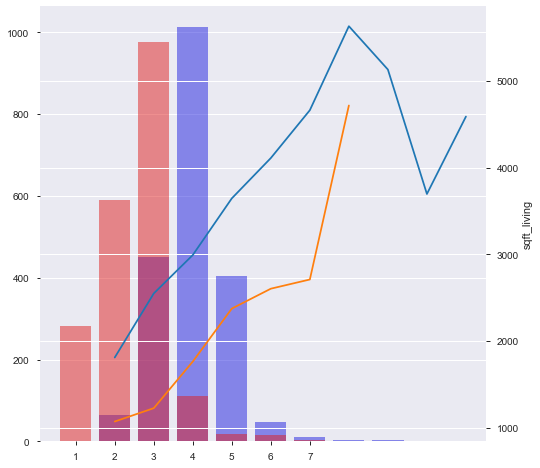

In [139]:
# comparing the number of bedrooms and sqft_living. here too we can see a clear difference in starting sqaure footage
# for 2 bedroom properties. 

# from this char we can understand why the price drops drastically at 9 rooms for the most expensive properties as 
# as the sqft_ving drastically drops as well

plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 1)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living'], alpha = 1)

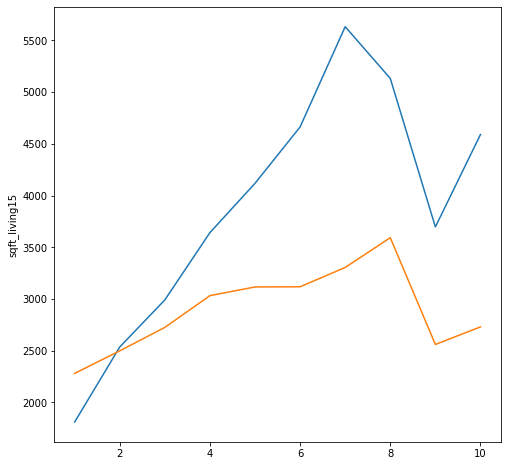

In [107]:
# the mean sqft_living for the number of bedrooms in comparison to the mean sqft_living for the neighbouring properties 
# we can see that the most expensive properties are generally larger than their neighbouring properties based 
# on the number of bedrooms

plt.figure(figsize = (8,8))
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 1)
ax4= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 1)

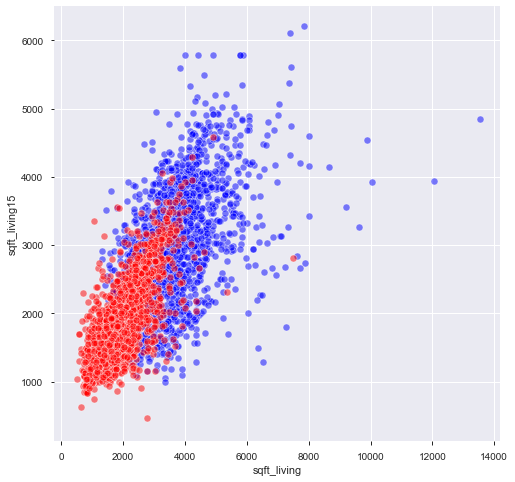

In [140]:
# by ploting all the data point for both subsets we can get a deeper look into how sqft_living and 
# sqft_liiving15 correlate 
plt.figure(figsize = (8,8))
ax = sns.scatterplot(most_expensive_2000['sqft_living'],most_expensive_2000['sqft_living15'], alpha =0.5, color = "blue")
ax2 = sns.scatterplot(df_sample2000['sqft_living'],df_sample2000['sqft_living15'], alpha = 0.5, color = 'red')

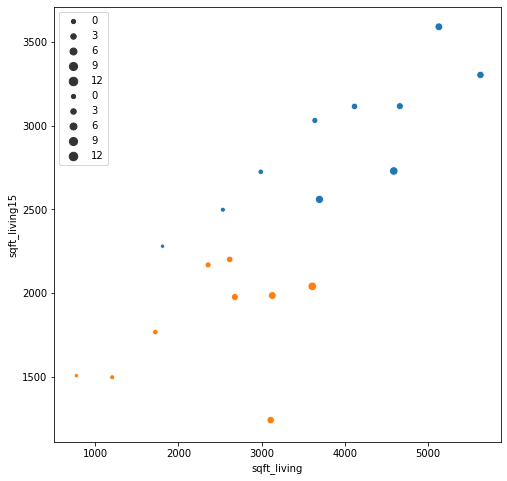

In [127]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me_bed_mean['sqft_living'],me_bed_mean['sqft_living15'], size = me_bed_mean.index.values)
ax2 = sns.scatterplot(df_sample_bed_mean['sqft_living'],df_sample_bed_mean['sqft_living15'], size = df_sample_bed_mean.index.values)

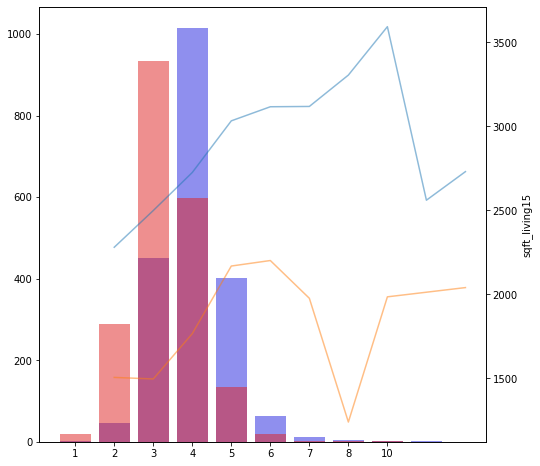

In [144]:
plt.figure(figsize = (8,8))
ax= sns.barplot(me_beds.index.values, me_beds.values, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(sample_beds.index.values, sample_beds.values, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living15'], alpha = 0.5)

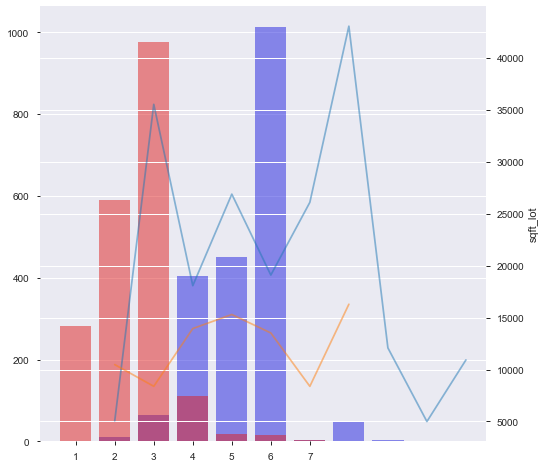

In [141]:
plt.figure(figsize = (8,8))
ax= sns.barplot(most_expensive_2000['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_lot'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_lot'], alpha = 0.5)

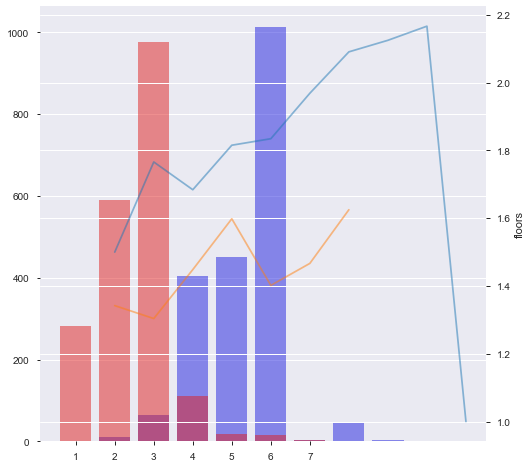

In [142]:
plt.figure(figsize = (8,8))
ax= sns.barplot(most_expensive_2000['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['floors'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['floors'], alpha = 0.5)

In [143]:
index_list2=list(df_sample2000.index.values)

In [144]:
sample2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list2)]

In [145]:
sample2000_geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
8   2414600126   4/15/2015  229500.0         3        1.0         1780   
11  9212900260   5/27/2014  468000.0         2        1.0         1160   
17  6865200140   5/29/2014  485000.0         4        1.0         1600   
19  7983200060   4/24/2015  230000.0         3        1.0         1250   
30  8562750320  11/10/2014  580500.0         3        2.5         2320   

    sqft_lot  floors  waterfront  condition  ...  sqft_above  sqft_basement  \
8       7470     1.0         0.0          3  ...        1050          730.0   
11      6000     1.0         0.0          4  ...         860          300.0   
17      4300     1.5         0.0          4  ...        1600            0.0   
19      9774     1.0         0.0          4  ...        1250            0.0   
30      3980     2.0         0.0          3  ...        2320            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
8      1960           0.0    98146  47.5123 -122.337           1780   
11     1942           0.0    98115  47.6900 -122.292           1330   
17     1916           0.0    98103  47.6648 -122.343           1610   
19     1969           0.0    98003  47.3343 -122.306           1280   
30     2003           0.0    98027  47.5391 -122.070           2580   

    sqft_lot15                     geometry  
8         8113  POINT (-122.33700 47.51230)  
11        6000  POINT (-122.29200 47.69000)  
17        4300  POINT (-122.34300 47.66480)  
19        8850  POINT (-122.30600 47.33430)  
30        3980  POINT (-122.07000 47.53910)  

[5 rows x 21 columns]

NameError: name 'me200_geo_df' is not defined

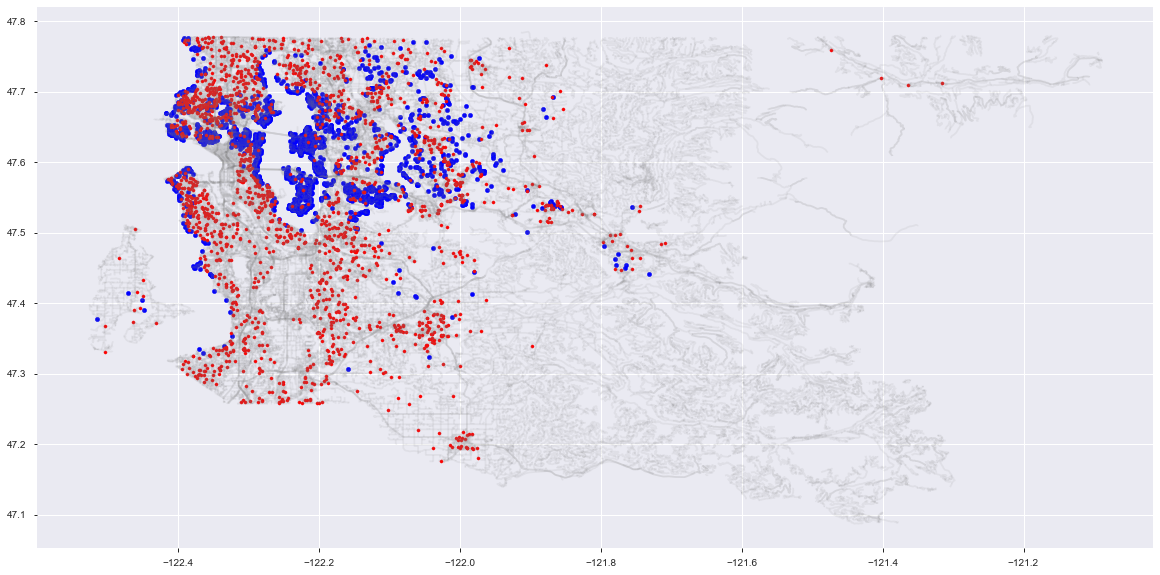

In [146]:
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='blue')
sample2000_geo_df.plot(ax=ax, markersize = 10, color='red')
minx, miny, maxx, maxy = me200_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('me2000andsample2000.png')

In [ ]:
me2000_geo_df.price.describe()

In [ ]:
ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(me2000_geo_df['price'], color = 'blue')
ax2=plt.figure(figsize = (8,8))
ax2 = sns.boxplot(df_sample2000['price'], color = 'red')


In [ ]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['yr_built'], me2000_geo_df['price'],color='red', alpha = 1 )
# ax2 = plt.hist(df_sample2000['sqft_living'], alpha = 0.5, label = 'Random Sample')


In [ ]:
plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['price'],color='red', alpha = 1) 

In [ ]:
plt.figure(figsize = (8,8))
ax= plt.scatter(me2000_geo_df['yr_built'],me2000_geo_df['price'],alpha = 1, label = 'Most Expensive')

In [ ]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['yr_built'], me2000_geo_df['grade'],color='red', alpha = 1 )

In [ ]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['yr_built'], me2000_geo_df['condition'],color='red', alpha = 1 )

In [ ]:
plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['condition'],color='red', alpha = 1) 

In [ ]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(me2000_geo_df['long'], me2000_geo_df['price'])

In [ ]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(me2000_geo_df['lat'], me2000_geo_df['price'])

In [ ]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_above'], me2000_geo_df['sqft_living'])

In [ ]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['yr_built'], me2000_geo_df['sqft_above'])

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
f = 'sqft_above~yr_built'
model = ols(f, data = me2000_geo_df).fit()

In [147]:
model.summary()

NameError: name 'model' is not defined

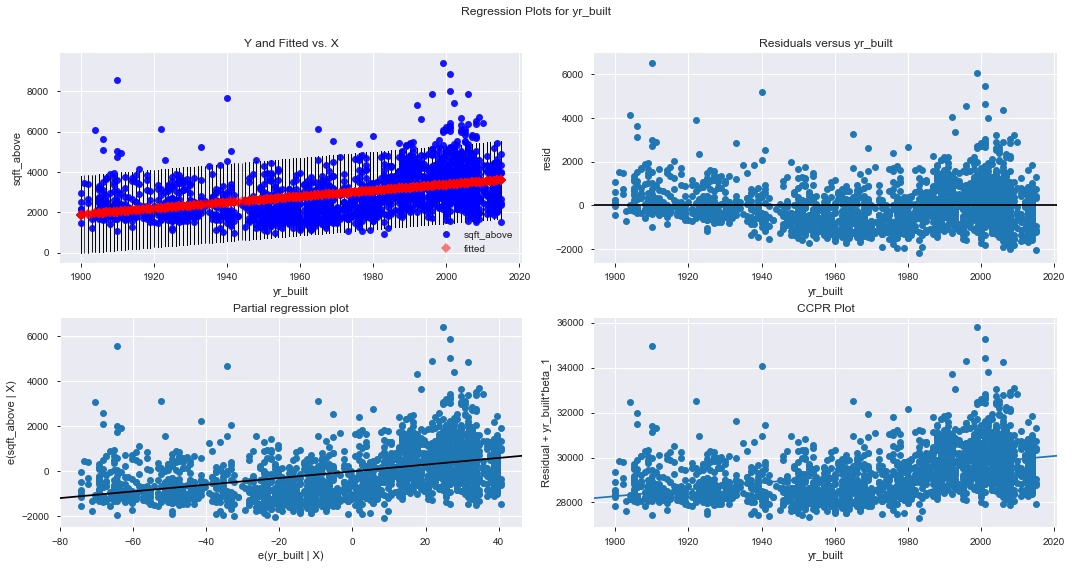

In [393]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_built", fig=fig)
plt.show()

In [394]:
sqftliving = 'sqft_living15~sqft_living'
model = ols(sqftliving, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     667.7
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          2.91e-127
Time:                        12:31:30   Log-Likelihood:                -16014.
No. Observations:                2000   AIC:                         3.203e+04
Df Residuals:                    1998   BIC:                         3.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1649.4435     53.796     30.661      0.000    1543.942    1754.946
sqft_living     0.3667      0.014     25.840      0.000       0.339       0.395
==============================================================================
Omnibus:                        2.546   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.539
Skew:                          -0.049   Prob(JB):                        0.281
Kurtosis:                       3.144   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

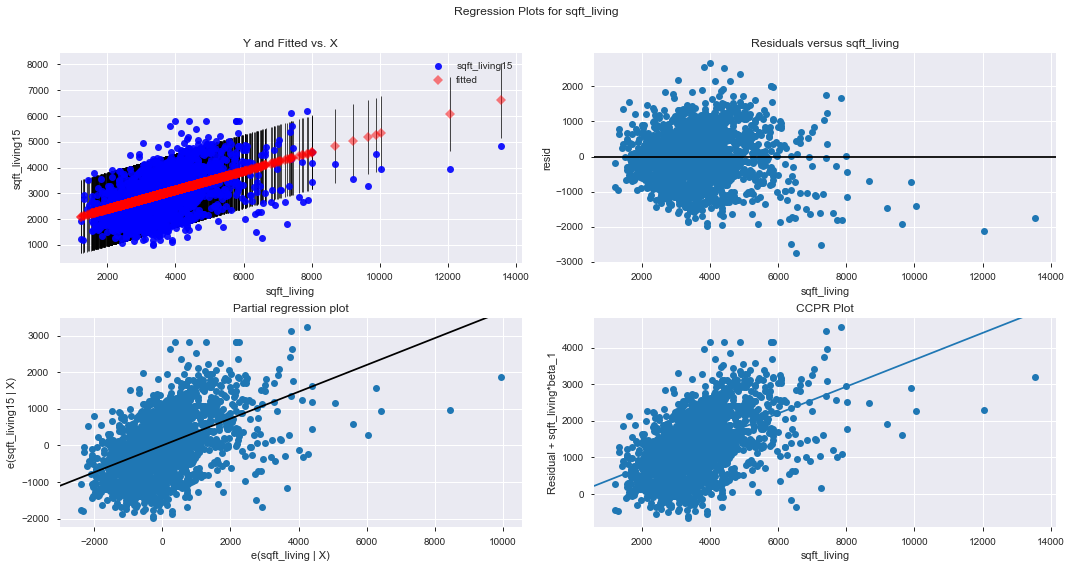

In [395]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [158]:
sqftliving_sample = 'sqft_living15~sqft_living'
model = ols(sqftliving_sample, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2308.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:36:29   Log-Likelihood:                -14776.
No. Observations:                2000   AIC:                         2.956e+04
Df Residuals:                    1998   BIC:                         2.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     762.3203     24.778     30.766      0.000     713.726     810.914
sqft_living     0.5860      0.012     48.043      0.000       0.562       0.610
==============================================================================
Omnibus:                       58.112   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.278
Skew:                           0.098   Prob(JB):                     4.21e-30
Kurtosis:                       4.259   Cond. No.                     5.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

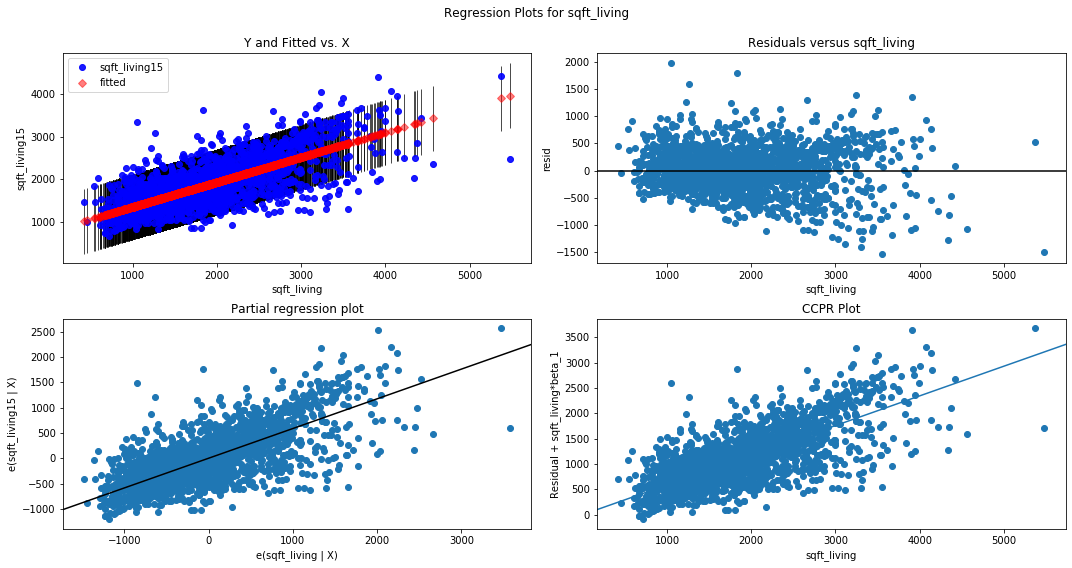

In [159]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [403]:
sqftprice = 'sqft_living~price'
model = ols(sqftprice, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     953.8
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          1.50e-171
Time:                        12:35:32   Log-Likelihood:                -16534.
No. Observations:                2000   AIC:                         3.307e+04
Df Residuals:                    1998   BIC:                         3.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2106.7081     53.138     39.646      0.000    2002.496    2210.920
price          0.0011   3.53e-05     30.883      0.000       0.001       0.001
==============================================================================
Omnibus:                      466.824   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2077.323
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       7.530   Cond. No.                     3.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

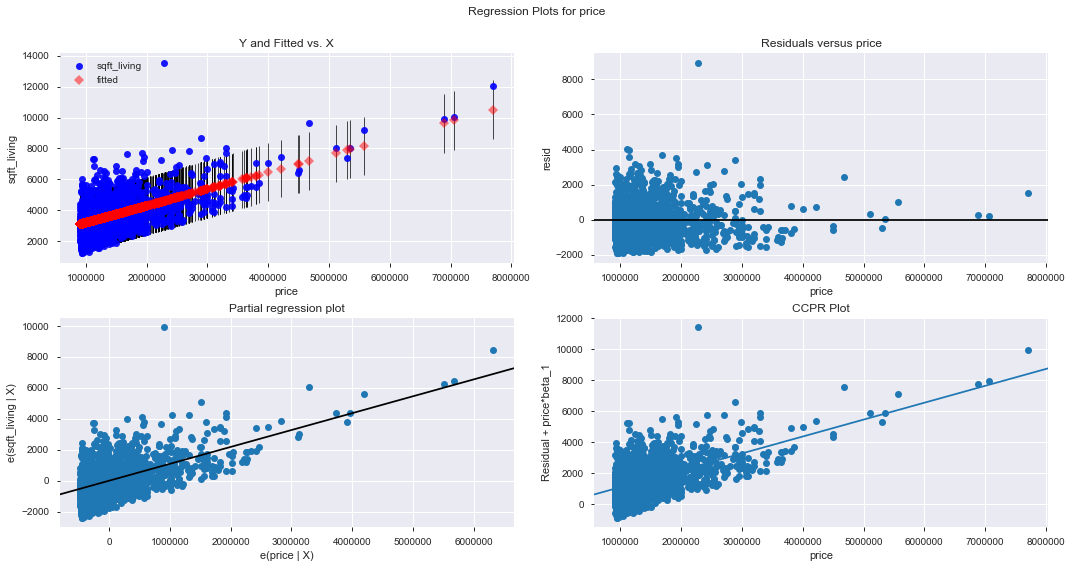

In [404]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "price", fig=fig)
plt.show()

In [ ]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me_bed_mean['sqft_living'],me_bed_mean['sqft_living15'], size = me_bed_mean.index.values)
ax2 = sns.scatterplot(df_sample_bed_mean['sqft_living'],df_sample_bed_mean['sqft_living15'], size = df_sample_bed_mean.index.values)

In [406]:
sqftlivingmean = 'sqft_living15~sqft_living'
model = ols(sqftlivingmean, data = me_bed_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     20.09
Date:                Sat, 19 Oct 2019   Prob (F-statistic):            0.00205
Time:                        12:48:10   Log-Likelihood:                -67.341
No. Observations:                  10   AIC:                             138.7
Df Residuals:                       8   BIC:                             139.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1790.5642    257.565      6.952      0.000    1196.618    2384.511
sqft_living     0.2855      0.064      4.482      0.002       0.139       0.432
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.303
Skew:                          -0.295   Prob(JB):                        0.860
Kurtosis:                       2.385   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

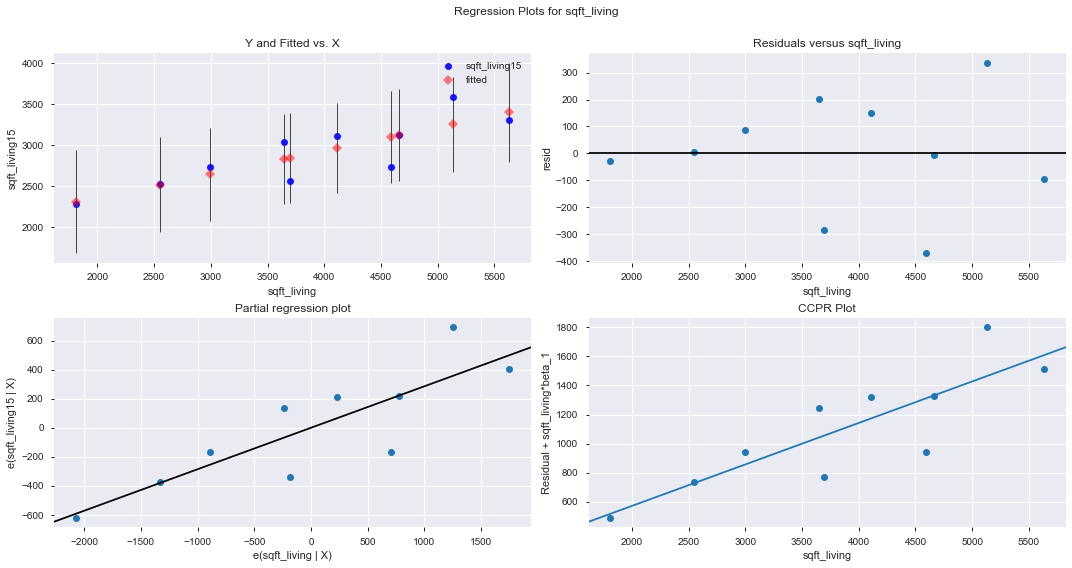

In [407]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [409]:
sqftlivingsamplemean = 'sqft_living15~sqft_living'
model = ols(sqftlivingsamplemean, data = df_sample_bed_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     7.905
Date:                Sat, 19 Oct 2019   Prob (F-statistic):             0.0307
Time:                        12:51:07   Log-Likelihood:                -53.945
No. Observations:                   8   AIC:                             111.9
Df Residuals:                       6   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1278.0463    213.984      5.973      0.001     754.447    1801.645
sqft_living     0.2481      0.088      2.812      0.031       0.032       0.464
==============================================================================
Omnibus:                        1.333   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.893
Skew:                           0.608   Prob(JB):                        0.640
Kurtosis:                       1.904   Cond. No.                     6.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

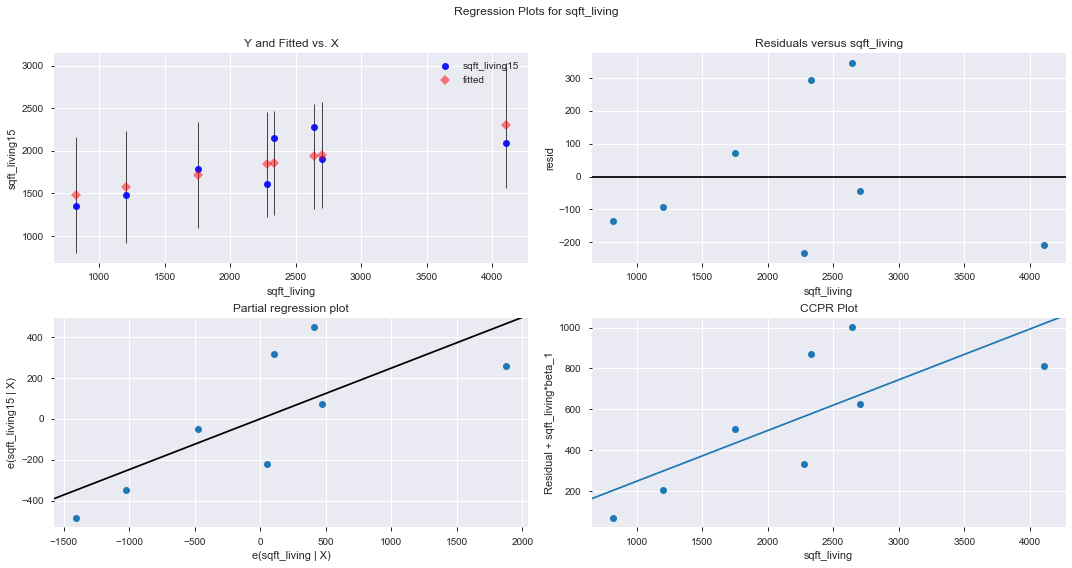

In [410]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [415]:
dups = me2000_geo_df[me2000_geo_df.duplicated(subset='id')]

In [416]:
dups

id       date      price  bedrooms  bathrooms  sqft_living  \
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
2563   7856400240 2015-02-11  1650000.0         4       3.00         3900   
4918   9809000020 2015-03-13  1940000.0         5       2.25         3120   
7839   4139420590 2014-08-27  1200000.0         4       3.50         4560   
13722  5332200530 2015-04-24  1020000.0         5       2.50         2350   
14295  3528000040 2015-03-26  1800000.0         3       3.25         5290   
15999  5536100020 2015-05-12  1190000.0         3       2.00         2160   
18977  7856400300 2015-03-22  1510000.0         2       2.50         3180   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
314       12103     1.0         0.0   3.0  ...        2690         1600.0   
2563       9750     1.0         NaN   4.0  ...        2520         1380.0   
4918      16672     2.0         0.0   0.0  ...        3120            0.0   
7839      16643     1.0         0.0   3.0  ...        2230         2330.0   
13722      4000     2.0         0.0   0.0  ...        2350            0.0   
14295    224442     2.0         0.0   0.0  ...        4540          750.0   
15999     15788     1.0         0.0   0.0  ...        2160            0.0   
18977      9400     2.0         0.0   4.0  ...        2610          570.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
314        1997          0.0    98006  47.5503 -122.102           3860   
2563       1972          0.0    98006  47.5605 -122.158           3410   
4918       1969          0.0    98004  47.6458 -122.219           3740   
7839       1995          0.0    98006  47.5521 -122.115           4060   
13722      1993          NaN    98112  47.6265 -122.296           1840   
14295      1988          0.0    98053  47.6671 -122.051           3750   
15999      1951          0.0    98004  47.6227 -122.207           2260   
18977      1985          0.0    98006  47.5617 -122.158           3760   

       sqft_lot15                     geometry  
314         11244  POINT (-122.10200 47.55030)  
2563         9450  POINT (-122.15800 47.56050)  
4918        17853  POINT (-122.21900 47.64580)  
7839        15177  POINT (-122.11500 47.55210)  
13722        4000  POINT (-122.29600 47.62650)  
14295       84936  POINT (-122.05100 47.66710)  
15999        9787  POINT (-122.20700 47.62270)  
18977        9450  POINT (-122.15800 47.56170)  

[8 rows x 22 columns]

In [420]:
me2000_geo_df.zipcode.value_counts()

98004    216
98040    173
98006    161
98112    136
98033    106
98199     84
98105     71
98075     66
98115     56
98053     52
98119     51
98074     49
98039     47
98052     46
98005     43
98177     41
98144     40
98103     37
98116     36
98109     35
98059     35
98027     33
98102     33
98117     32
98034     31
98122     31
98077     25
98008     24
98072     23
98029     20
98136     16
98166     16
98125     14
98118     13
98007     12
98065     11
98024     10
98146     10
98107      8
98155      7
98045      7
98056      6
98014      5
98070      4
98028      4
98038      4
98019      3
98058      3
98198      3
98126      3
98023      2
98178      2
98011      1
98010      1
98092      1
98003      1
Name: zipcode, dtype: int64

(array([467., 430., 149., 178.,   1., 508.,  64.,  57.,  59.,  87.]),
 array([98003. , 98022.6, 98042.2, 98061.8, 98081.4, 98101. , 98120.6,
        98140.2, 98159.8, 98179.4, 98199. ]),
 <a list of 10 Patch objects>)

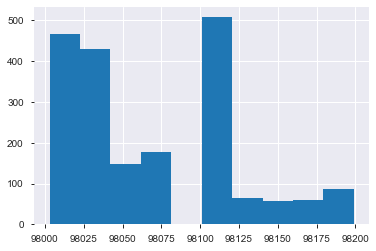

In [422]:
plt.hist(me2000_geo_df['zipcode'])

In [423]:
id_list = list(dups.id.values)

In [424]:
id_list

[4139480200,
 7856400240,
 9809000020,
 4139420590,
 5332200530,
 3528000040,
 5536100020,
 7856400300]

In [434]:
dups_df = me2000_geo_df[me2000_geo_df.id.map(lambda x: x in id_list)]
dups_df

id       date      price  bedrooms  bathrooms  sqft_living  \
313    4139480200 2014-06-18  1380000.0         4       3.25         4290   
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
2562   7856400240 2014-06-27  1620000.0         4       3.00         3900   
2563   7856400240 2015-02-11  1650000.0         4       3.00         3900   
4917   9809000020 2014-05-13  1900000.0         5       2.25         3120   
4918   9809000020 2015-03-13  1940000.0         5       2.25         3120   
7838   4139420590 2014-05-20  1210000.0         4       3.50         4560   
7839   4139420590 2014-08-27  1200000.0         4       3.50         4560   
13721  5332200530 2014-06-13   910000.0         5       2.50         2350   
13722  5332200530 2015-04-24  1020000.0         5       2.50         2350   
14294  3528000040 2014-10-01  1690000.0         3       3.25         5290   
14295  3528000040 2015-03-26  1800000.0         3       3.25         5290   
15998  5536100020 2014-12-15   987000.0         3       2.00         2160   
15999  5536100020 2015-05-12  1190000.0         3       2.00         2160   
18976  7856400300 2014-07-02  1410000.0         2       2.50         3180   
18977  7856400300 2015-03-22  1510000.0         2       2.50         3180   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
313       12103     1.0         0.0   3.0  ...        2690         1600.0   
314       12103     1.0         0.0   3.0  ...        2690         1600.0   
2562       9750     1.0         0.0   4.0  ...        2520         1380.0   
2563       9750     1.0         NaN   4.0  ...        2520         1380.0   
4917      16672     2.0         0.0   0.0  ...        3120            0.0   
4918      16672     2.0         0.0   0.0  ...        3120            0.0   
7838      16643     1.0         0.0   3.0  ...        2230         2330.0   
7839      16643     1.0         0.0   3.0  ...        2230         2330.0   
13721      4000     2.0         0.0   0.0  ...        2350            0.0   
13722      4000     2.0         0.0   0.0  ...        2350            0.0   
14294    224442     2.0         0.0   0.0  ...        4540          750.0   
14295    224442     2.0         0.0   0.0  ...        4540          750.0   
15998     15788     1.0         0.0   0.0  ...        2160            0.0   
15999     15788     1.0         0.0   0.0  ...        2160            0.0   
18976      9400     2.0         0.0   4.0  ...        2610          570.0   
18977      9400     2.0         0.0   4.0  ...        2610          570.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
313        1997          0.0    98006  47.5503 -122.102           3860   
314        1997          0.0    98006  47.5503 -122.102           3860   
2562       1972          0.0    98006  47.5605 -122.158           3410   
2563       1972          0.0    98006  47.5605 -122.158           3410   
4917       1969          NaN    98004  47.6458 -122.219           3740   
4918       1969          0.0    98004  47.6458 -122.219           3740   
7838       1995          0.0    98006  47.5521 -122.115           4060   
7839       1995          0.0    98006  47.5521 -122.115           4060   
13721      1993          0.0    98112  47.6265 -122.296           1840   
13722      1993          NaN    98112  47.6265 -122.296           1840   
14294      1988          0.0    98053  47.6671 -122.051           3750   
14295      1988          0.0    98053  47.6671 -122.051           3750   
15998      1951          0.0    98004  47.6227 -122.207           2260   
15999      1951          0.0    98004  47.6227 -122.207           2260   
18976      1985          0.0    98006  47.5617 -122.158           3760   
18977      1985          0.0    98006  47.5617 -122.158           3760   

       sqft_lot15                     geometry  
313         11244  POINT (-122.10200 47.55030)  
314         11244  POINT (-122.10200 4

In [433]:
list_dups=list(dups_df.price)
list_dups
dups_diff = [i for i in range(0,len(list_dups) if)]

[1380000.0,
 1400000.0,
 1620000.0,
 1650000.0,
 1900000.0,
 1940000.0,
 1210000.0,
 1200000.0,
 910000.0,
 1020000.0,
 1690000.0,
 1800000.0,
 987000.0,
 1190000.0,
 1410000.0,
 1510000.0]

In [436]:
dups_diff=[]
for i in range(0,len(list_dups)):
    if i % 2 != 0:
        dups_diff.append(list_dups[i]- list_dups[i-1])

In [439]:
dups_diff

[20000.0, 30000.0, 40000.0, -10000.0, 110000.0, 110000.0, 203000.0, 100000.0]

In [441]:
import numpy as np
np.mean(dups_diff)

75375.0

In [429]:
dups_sample = df_sample2000[df_sample2000.duplicated(subset='id')]
dups_sample

id       date     price  bedrooms  bathrooms  sqft_living  \
1863   2143700830 2015-03-12  370000.0         4        2.5         2100   
20037  8648900110 2014-05-05  555000.0         3        2.5         1940   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
1863      19680     1.5         0.0   0.0  ...        2100            0.0   
20037      3211     2.0         0.0   0.0  ...        1940            0.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
1863       1914          0.0    98055  47.4787 -122.230           1340   
20037      2009          0.0    98027  47.5644 -122.093           1880   

       sqft_lot15                     geometry  
1863        12300  POINT (-122.23000 47.47870)  
20037        3078  POINT (-122.09300 47.56440)  

[2 rows x 22 columns]

In [442]:
me2000_geo_df.yr_renovated.unique()

array([   0.,   nan, 2010., 1992., 1991., 1994., 2003., 2014., 1998.,
       1990., 2007., 2006., 2013., 1968., 2002., 2008., 1995., 1963.,
       2005., 1977., 1999., 2001., 1997., 1993., 2000., 1956., 1983.,
       1980., 1987., 1996., 2009., 2004., 2015., 1989., 2012., 1984.,
       1988., 1985., 1986., 1982., 1979., 1958., 1965.])

In [449]:
me2000_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2000 entries, 5 to 21590
Data columns (total 22 columns):
id               2000 non-null int64
date             2000 non-null datetime64[ns]
price            2000 non-null float64
bedrooms         2000 non-null int64
bathrooms        2000 non-null float64
sqft_living      2000 non-null int64
sqft_lot         2000 non-null int64
floors           2000 non-null float64
waterfront       1795 non-null float64
view             1994 non-null float64
condition        2000 non-null int64
grade            2000 non-null int64
sqft_above       2000 non-null int64
sqft_basement    2000 non-null object
yr_built         2000 non-null int64
yr_renovated     1646 non-null float64
zipcode          2000 non-null int64
lat              2000 non-null float64
long             2000 non-null float64
sqft_living15    2000 non-null int64
sqft_lot15       2000 non-null int64
geometry         2000 non-null geometry
dtypes: datetime64[ns](1), float64(8), ge

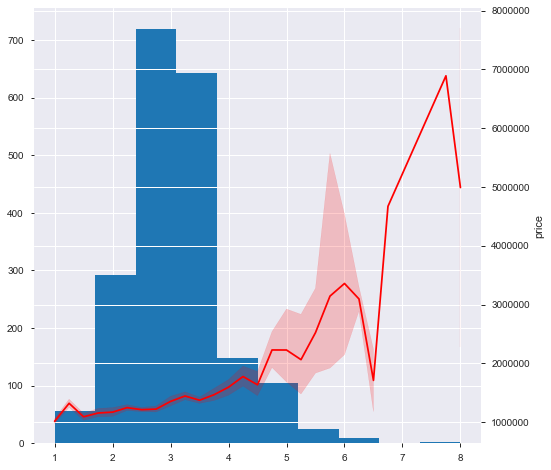

In [447]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['bathrooms'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['bathrooms'], me2000_geo_df['price'],color='red', alpha = 1 )

In [461]:
me2000_geo_df['sqft_basement'].value_counts()

0.0       832
0.0        38
1000.0     30
800.0      28
1100.0     20
700.0      20
900.0      18
880.0      15
990.0      15
1120.0     14
1020.0     14
400.0      14
850.0      13
1040.0     13
910.0      13
1200.0     12
1010.0     12
500.0      11
840.0      11
920.0      11
790.0      11
600.0      11
560.0      10
1400.0     10
860.0      10
1270.0     10
1220.0      9
630.0       9
1450.0      9
960.0       9
         ... 
2570.0      1
2360.0      1
2120.0      1
150.0       1
2490.0      1
2610.0      1
1770.0      1
2110.0      1
1910.0      1
3500.0      1
2040.0      1
270.0       1
4130.0      1
2390.0      1
2200.0      1
2000.0      1
2810.0      1
2180.0      1
3000.0      1
1920.0      1
2080.0      1
2500.0      1
2600.0      1
2580.0      1
1860.0      1
1810.0      1
2730.0      1
2100.0      1
470.0       1
1840.0      1
Name: sqft_basement, Length: 236, dtype: int64

In [460]:
me2000_geo_df['sqft_basement'].replace(0,0.0,inplace = True)

In [468]:
me2000_geo_df['sqft_basement'] = me2000_geo_df['sqft_basement'].astype('float32')

In [455]:
qest_me2000 = me2000_geo_df[me2000_geo_df['sqft_basement']=='?']

In [456]:
qest_me2000

id       date      price  bedrooms  bathrooms  sqft_living  \
384     713500030 2014-07-28  1350000.0         5       3.50         4800   
890    1962200435 2014-11-10  1010000.0         4       1.00         1820   
1105   2505500030 2014-07-03  1130000.0         4       2.50         3160   
1768    625059051 2014-09-03  2350000.0         4       2.25         4370   
2123   4379600030 2014-07-29  1330000.0         3       3.75         6400   
2779   5701500030 2014-06-01  1510000.0         4       3.50         3480   
3018   3377900195 2014-09-29  2530000.0         4       5.50         6930   
3074   1692900110 2015-03-20  1130000.0         5       3.25         3080   
3375   3629921240 2014-07-28   970000.0         4       4.50         3890   
3857   1118001295 2014-12-03  2200000.0         4       3.00         3540   
4094   3407700047 2014-10-29  1060000.0         3       3.25         2990   
4365   4166600115 2014-11-21  1150000.0         3       2.75         3230   
4910   6117500430 2014-08-19   925000.0         5       3.50         4050   
4996   3625710080 2014-06-26  1030000.0         4       3.50         3320   
5874   2525049148 2014-10-07  3420000.0         5       5.00         5450   
6229   1437580480 2014-09-18   994000.0         5       3.25         4260   
7070   2724079090 2015-01-05  1650000.0         4       3.25         3920   
7806   1689400375 2014-08-05  1450000.0         4       3.25         3100   
9098   2024059110 2015-04-20   925000.0         3       3.25         4110   
9103   7352200100 2015-02-24  1360000.0         2       1.75         2620   
10685   486000510 2014-05-23  1330000.0         4       3.00         3370   
10824  9290850810 2014-06-13   950000.0         4       2.50         3770   
11586  7237501040 2014-06-17  1200000.0         4       3.50         4170   
12021  4232400400 2014-09-29  1260000.0         4       2.00         2970   
14995   809001060 2014-05-13  1110000.0         4       1.50         2740   
15087   686800080 2014-06-12  1030000.0         4       2.50         2370   
15231   629000605 2015-02-27  1400000.0         3       2.50         2910   
15314  1257200050 2014-07-31  1310000.0         5       3.50         3270   
15915  5453700020 2014-08-25   910000.0         3       2.25         2180   
16235  8925100440 2015-03-23   925000.0         4       2.25         2110   
18616  1337800665 2014-08-11  1330000.0         4       3.25         2850   
18716  3303980210 2015-04-27  1120000.0         4       3.75         4040   
19584   284000025 2015-04-20  1410000.0         2       2.00         2180   
19955  2623039019 2014-05-08   988500.0         3       2.75         2015   
20150  3630200780 2014-05-22  1050000.0         4       3.75         3860   
20553  8895800110 2014-08-05  1300000.0         5       4.00         3870   
21017  7203230040 2014-10-27  1050000.0         5       3.25         4240   
21581   191100405 2015-04-21  1580000.0         4       3.25         3410   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
384       14984     2.0         0.0   2.0  ...        3480              ?   
890        5400     1.5         NaN   0.0  ...        1820              ?   
1105       8281     2.0         0.0   0.0  ...        3160              ?   
1768      22863     2.5         0.0   3.0  ...        3670              ?   
2123      76665     1.0         0.0   2.0  ...        3810              ?   
2779       7232     2.0         0.0   0.0  ...        2580              ?   
3018      45100     1.0         0.0   0.0  ...        4310              ?   
3074      13394     1.0         0.0   2.0  ...        2230              ?   
3375       5906     2.0         NaN   3.0  ...        3060              ?   
3857      11098     2.0         0.0   0.0  ...        3000              ?   
4094     189852     2.0         0.0   0.0  ...        2990              ?   
4365      75889     2.0         1.0   4.0  ...        3230              ?   
4910      

In [469]:
me2000_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2000 entries, 5 to 21590
Data columns (total 22 columns):
id               2000 non-null int64
date             2000 non-null datetime64[ns]
price            2000 non-null float64
bedrooms         2000 non-null int64
bathrooms        2000 non-null float64
sqft_living      2000 non-null int64
sqft_lot         2000 non-null int64
floors           2000 non-null float64
waterfront       1795 non-null float64
view             1994 non-null float64
condition        2000 non-null int64
grade            2000 non-null int64
sqft_above       2000 non-null int64
sqft_basement    2000 non-null float32
yr_built         2000 non-null int64
yr_renovated     1646 non-null float64
zipcode          2000 non-null int64
lat              2000 non-null float64
long             2000 non-null float64
sqft_living15    2000 non-null int64
sqft_lot15       2000 non-null int64
geometry         2000 non-null geometry
dtypes: datetime64[ns](1), float32(1), f

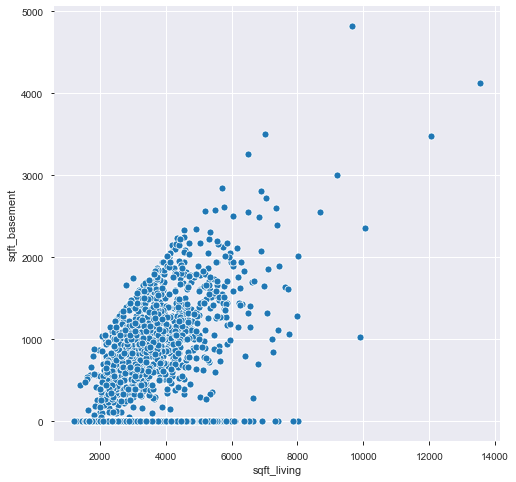

In [470]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_living'], me2000_geo_df['sqft_basement'])

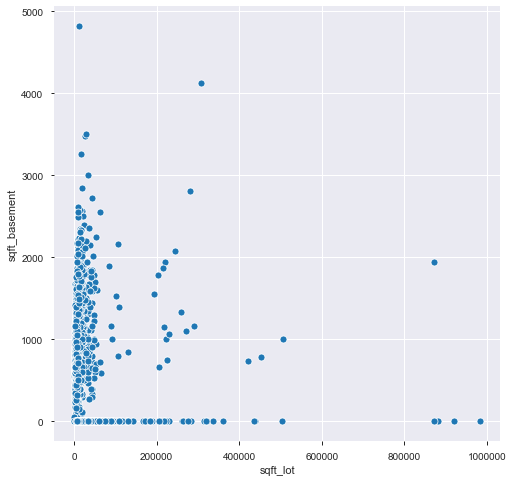

In [475]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_lot'], me2000_geo_df['sqft_basement'])

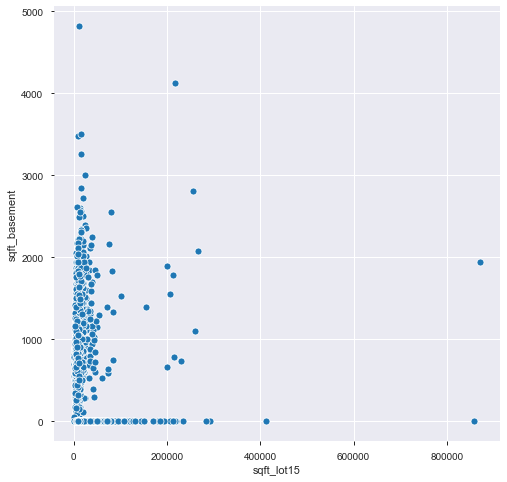

In [476]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_lot15'], me2000_geo_df['sqft_basement'])

In [479]:
sqftbasement = 'sqft_basement~sqft_living15'
model = ols(sqftbasement, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_basement   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.96
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           0.000114
Time:                        14:36:44   Log-Likelihood:                -15825.
No. Observations:                2000   AIC:                         3.165e+04
Df Residuals:                    1998   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       405.9666     54.446      7.456      0.000     299.189     512.744
sqft_living15     0.0681      0.018      3.867      0.000       0.034       0.103
==============================================================================
Omnibus:                      210.017   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.204
Skew:                           0.848   Prob(JB):                     5.25e-62
Kurtosis:                       3.715   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
sqftabove = 'sqft_above~sqft_living'
model = ols(sqftabove, data = most_expensive_2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     4238.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:32:37   Log-Likelihood:                -15688.
No. Observations:                2000   AIC:                         3.138e+04
Df Residuals:                    1998   BIC:                         3.139e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     155.9998     45.728      3.411      0.001      66.321     245.679
sqft_living     0.7858      0.012     65.097      0.000       0.762       0.809
==============================================================================
Omnibus:                       95.397   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.438
Skew:                          -0.317   Prob(JB):                     1.68e-14
Kurtosis:                       2.401   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

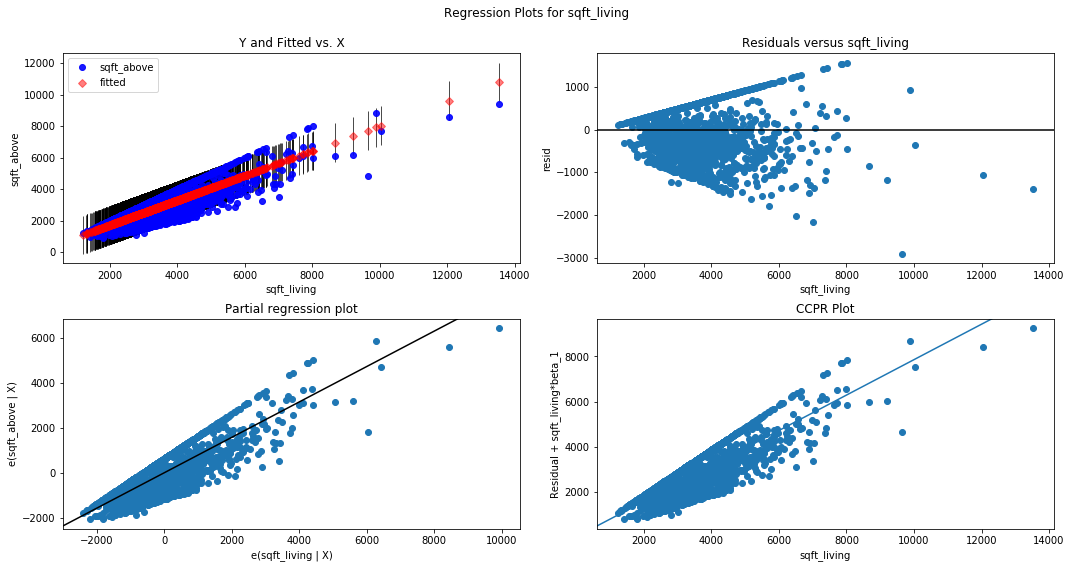

In [154]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [160]:
sqftabove_sample = 'sqft_above~sqft_living'
model = ols(sqftabove_sample, data = df_sample2000).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4692.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:39:19   Log-Likelihood:                -14646.
No. Observations:                2000   AIC:                         2.930e+04
Df Residuals:                    1998   BIC:                         2.931e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     162.8202     23.221      7.012      0.000     117.281     208.360
sqft_living     0.7830      0.011     68.496      0.000       0.761       0.805
==============================================================================
Omnibus:                      162.829   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.293
Skew:                          -0.783   Prob(JB):                     4.35e-45
Kurtosis:                       2.990   Cond. No.                     5.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

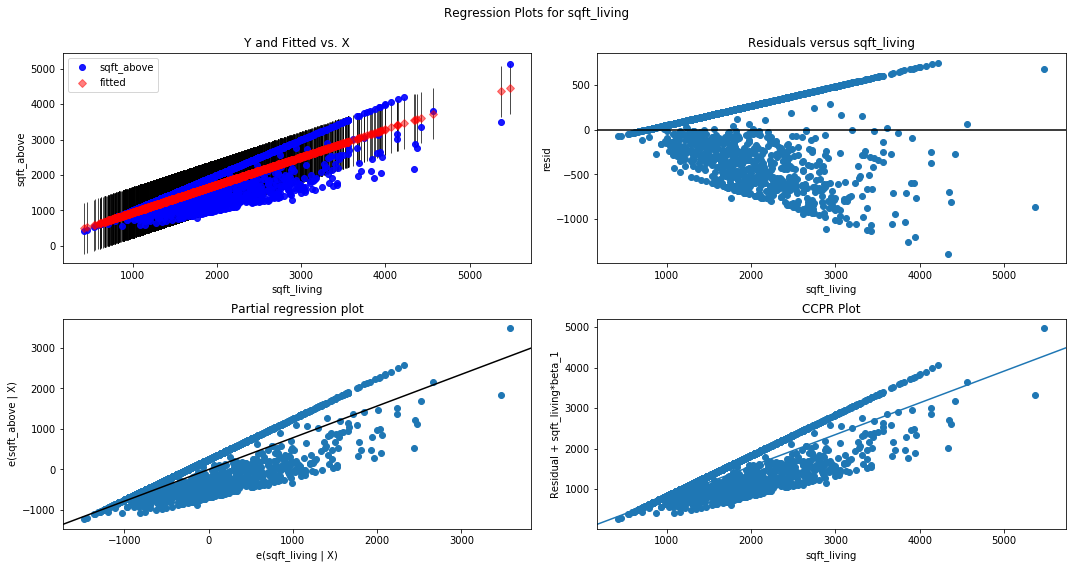

In [161]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()